In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
with open("New_Data.pickle",'rb') as f:
    Data = pickle.load(f)

이용가능연령을 기준으로 고객군을 나눈다. <br>
그리고 그분들이 평가점수를 후하게 주는지, 그리고 공짜를 좋아하는 지? 어느 정도 가격선까지 허용하는 지 파악 가능

In [3]:
Data.head()

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
with open("EDA.pk",'rb') as f:
    EDA = pickle.load(f)

In [4]:
def Feature_extracy(data):
    feature_columns = list(data.columns.difference(["평가점수"]))
    y = data.평가점수
    data = data[feature_columns]
    data = data.drop(['이용가능연령구분','카테고리','장르','버전','안드로이드버전'],axis = 1)
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    return data, y

In [5]:
def Applen(data):
    data['app이름길이'] = data.app이름.apply(lambda x : len(x))
    data = data.drop(['app이름'],axis = 1)
    return data

In [6]:
def Appsize(data):
    data.app크기[data.app크기 == "Varies with device"] = "1M"
    Size = data.app크기.unique()
    
    app_size = []
    # M이 있을 경우에 제외하고 x1024, k있을 경우는 그냥 k만 지우자
    for i in Size:
        if i[-1] == "M":
            temp_data = float(i.replace("M",""))
            temp_data *= 1024
            app_size.append(temp_data)
        else:
            temp_data_2 = float(i.replace("k",""))
            app_size.append(temp_data_2)
            
    dict_app = {}
    for i in range(len(Size)):
        dict_app[Size[i]] = app_size[i]
    
    data['app크기'] = data.app크기.apply(lambda x : dict_app[x])
    
    return data

In [7]:
def Price_adh(data):
    data.가격 = data.가격.apply(lambda x : x.replace("$",""))
    data.가격 = data.가격.apply(lambda x : x.replace(",",""))
    data.가격 = data.가격.apply(lambda x : float(x.replace(",","")))
    return data

In [8]:
def Down_adj(data):
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace("+",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : int(x))
    return data

In [9]:
def Version_adj(data):
    Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }
    Month = data.마지막업데이트.str.split(' ').str[0]
    Month_data = Month.apply(lambda x : Month_dict[x])
    BBB = data.마지막업데이트.str.split(' ').str[1:]
    Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
    Year = BBB.str[1].apply(lambda x : int(x))
    return Month_data, Day, Year

In [10]:
def Update_version(data,Month,Day,Year):
    data = data.drop(['마지막업데이트'],axis = 1)
    data['업데이트_월'] = Month
    data['업데이트_일'] = Day
    data['업데이트_연도'] = Year
    return data

In [11]:
def All_adj(data):
    data = Applen(data)
    data = Appsize(data)
    Month,Day,Year = Version_adj(data)
    data = Update_version(data,Month,Day,Year)
    return data

In [12]:
def Version_adj(data):
    Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }
    Month = data.마지막업데이트.str.split(' ').str[0]
    Month_data = Month.apply(lambda x : Month_dict[x])
    BBB = data.마지막업데이트.str.split(' ').str[1:]
    Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
    Year = BBB.str[1].apply(lambda x : int(x))
    return Month, Day, Year

In [13]:
def Update_version(data,Month,Day,Year):
    data = data.drop(['마지막업데이트'],axis = 1)
    data['업데이트_월'] = Month
    data['업데이트_일'] = Day
    data['업데이트_연도'] = Year
    return data

In [14]:
def Distplot(data):
    plt.figure(figsize = (20,30))
    plt.subplot(3,1,1)
    sns.regplot(data.업데이트_월,y)
    
    plt.subplot(3,1,2)
    sns.regplot(data.업데이트_일,y)
    
    plt.subplot(3,1,3)
    sns.regplot(data.업데이트_연도,y)

In [16]:
Data.이용가능연령구분.value_counts()

Everyone           7421
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: 이용가능연령구분, dtype: int64

In [19]:
Data[Data.이용가능연령구분 == "Unrated"].장르

8266    Tools
Name: 장르, dtype: object

In [18]:
Data[Data.이용가능연령구분 == "Adults only 18+"].장르

298     Comics
3043    Sports
6424    Comics
Name: 장르, dtype: object

In [5]:
Everyone_TTT = EDA['Everyone'].drop(['평가점수','리뷰수'],axis = 1)

In [6]:
Everyone_TTT = Everyone_TTT.drop(['app이름'],axis = 1)

In [81]:
Data, y = Feature_extracy(Data)

In [84]:
Data = All_adj(Data)

In [87]:
Down_adj(Data)

AttributeError: 'int' object has no attribute 'replace'

In [91]:
Data.리뷰수 = Data.리뷰수.apply(lambda x : int(x))

In [92]:
Data['리_다'] = Data.리뷰수 / Data.다운로드수

In [96]:
Data = Data.drop(['다운로드수','리뷰수','업데이트_월','업데이트_일','유료구분'],axis = 1)

In [97]:
Data.corr()

,app크기,가격,app이름길이,업데이트_연도,리_다
app크기,1.000000,-0.016066,0.009282,0.138250,0.042817
가격,-0.016066,1.000000,-0.024494,-0.003382,0.026846
app이름길이,0.009282,-0.024494,1.000000,0.141424,-0.043862
업데이트_연도,0.138250,-0.003382,0.141424,1.000000,-0.001048
리_다,0.042817,0.026846,-0.043862,-0.001048,1.000000


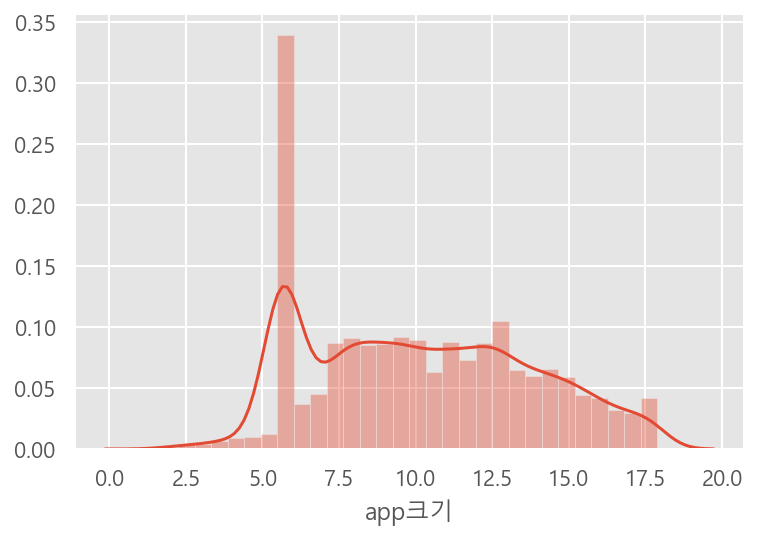

In [108]:
sns.distplot(Data.app크기.apply(lambda x : x**(1/4)))

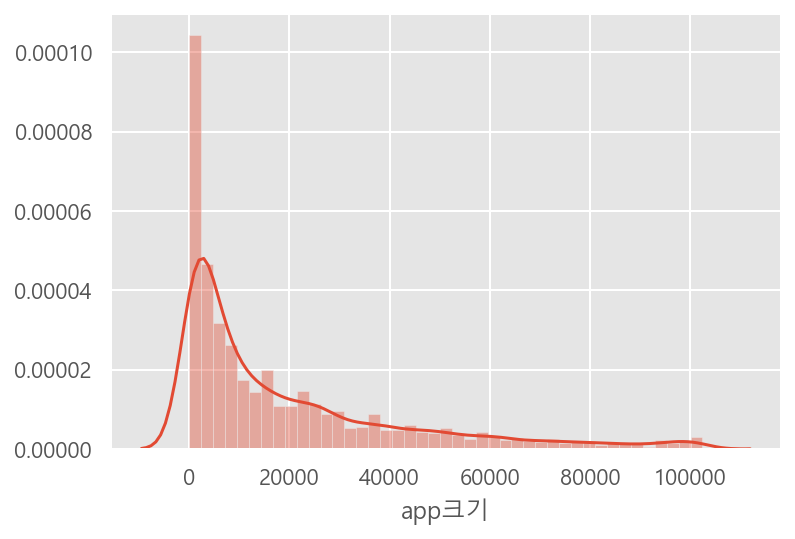

In [98]:
sns.distplot(Data.app크기)

In [7]:
Data.이용가능연령구분.value_counts()

Everyone           7421
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: 이용가능연령구분, dtype: int64

In [8]:
Data.가격 = Data.가격.apply(lambda x : float(x.replace('$',"")))

In [9]:
Data.장르.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

##### 이용가능구분, 장르

In [10]:
Data.장르 = Data.장르.str.split(';').str[0]

In [11]:
Data.장르.value_counts()

Tools                      734
Entertainment              577
Education                  563
Action                     375
Productivity               351
Medical                    350
Sports                     337
Communication              329
Finance                    323
Photography                318
Lifestyle                  315
Personalization            314
Business                   303
Health & Fitness           299
Casual                     262
Social                     259
Shopping                   238
News & Magazines           233
Travel & Local             226
Arcade                     223
Simulation                 212
Dating                     195
Books & Reference          180
Video Players & Editors    163
Puzzle                     148
Maps & Navigation          124
Role Playing               119
Racing                     114
Food & Drink               109
Strategy                   107
Educational                103
Adventure                   89
House & 

In [12]:
# 포함시킴
Data['장르'] = Data["장르"].replace("Music & Audio","Music")

In [13]:
# 미리 적용해야함.. 이유는 아래 칸애!!
Data['이용가능연령구분'] = Data["이용가능연령구분"].replace("Unrated","Everyone")

In [14]:
# 미리 적용해야함..이유는 아래칸에
Data['이용가능연령구분'] = Data['이용가능연령구분'].replace("Adults only 18+","Mature 17+")

##### 갑작스러운 생각 떠오름.. 장르를 보는 것이 더 포괄적으로 사람의 성향을 보는 것으로 판단.

In [15]:
Data[Data.장르 == "Art & Design"].카테고리.value_counts()

ART_AND_DESIGN    62
FAMILY             3
Name: 카테고리, dtype: int64

In [16]:
Data[Data.카테고리 == "ART_AND_DESIGN"].장르.value_counts()

Art & Design    62
Name: 장르, dtype: int64

##### 갑작스러운 생각End

In [17]:
Total_data = dict(list(Data.groupby('이용가능연령구분')))

In [18]:
Temp = dict(list(Data[['이용가능연령구분','장르']].groupby(['이용가능연령구분'])))

In [19]:
list_Temp = Data.이용가능연령구분.unique()

In [20]:
list_Temp = list(list_Temp)

In [21]:
list_Temp

['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+']

In [22]:
list_Temp.index("Teen")

1

In [23]:
def Check(data,number = 0.01):
    return data[data >= number]

In [24]:
def Barplot(data,name):
    data_name = data.index 
    data_values = data.values
    plt.figure(figsize = (10,10))
    sns.barplot(data_name, data_values)
    plt.xlabel(name,fontsize = 15)
    plt.show()

In [25]:
def Distplot(data,name):
    plt.figure(figsize  = (20,10))
    sns.distplot(data)
    plt.xlabel(name,fontsize = 20)
    plt.show()

In [26]:
def Represent(data,data_name):
    index= list_Temp.index(data_name)
    data_name = data[list_Temp[index]] # data정의
    
    # 평가점수 분포 그리기.
    Distplot(data_name.평가점수,"평가점수")
    print("\n")
    print("----------------------------------------------------------")
    print("\n")
    print("\n")
    
    # 유료 구분 구하기
    print('유료와 무료의 분포를 구해보자')
    print("\n")
    Temp_DD = data_name.유료구분.value_counts()
    Temp_DDD = Temp_DD.reset_index()
    Temp_DDD.columns = ['유료구분','cnt']
    Temp_DDD['비율'] = Temp_DDD['cnt'] / Temp_DDD['cnt'].sum()
    print(Temp_DDD.set_index('유료구분'))
    
    print("\n")
    Barplot(Temp_DD,"유료구분")
    print("\n")
    print("----------------------------------------------------------")
    print("\n")
    print("\n")
    
    # 유료 가격의 분포 구하기
    print("가격대의 기초통계량")
    print('\n')
    Tmp = data_name[data_name.유료구분 == 'Paid'].가격
    print(Tmp.describe())
    
    print('\n')
    Distplot(data_name[data_name.유료구분 == 'Paid'].가격,"가격대")
    
    # 가장 높은 가격대 정보 출력__returen 값으로 주자.
    print('\n')
    print('\n')
    return data_name[data_name.가격 == max(data_name.가격)]

#####  Everyone이 누구인가 추론
- 아마 직장인,, 현대 사회를 이끌어가시는 분들

In [27]:
# Everyone : 전체이용가
# 아마 직장인..? 아이를 가지고 계신 부모님..? 사회를 이끌어가시는 분들.
Temp[list_Temp[0]].장르.value_counts() / Temp[list_Temp[0]].장르.value_counts().sum()

Tools                      0.098087
Education                  0.071679
Productivity               0.046753
Entertainment              0.046349
Medical                    0.044867
Finance                    0.042980
Photography                0.040555
Business                   0.040286
Communication              0.039881
Sports                     0.039342
Lifestyle                  0.038130
Personalization            0.036783
Health & Fitness           0.036244
Travel & Local             0.029642
Casual                     0.029642
Shopping                   0.025195
Books & Reference          0.020480
Arcade                     0.020210
Simulation                 0.019806
Video Players & Editors    0.018054
Puzzle                     0.017920
News & Magazines           0.016842
Maps & Navigation          0.016303
Action                     0.014282
Food & Drink               0.013473
Racing                     0.012396
Educational                0.011722
Social                     0

In [28]:
# 파레토 법칙 과 유사.. 이것으로 이 Everyone의 80%를 설명 가능
Check(Temp[list_Temp[0]].장르.value_counts() / Temp[list_Temp[0]].장르.value_counts().sum())[:21]

Tools                      0.098087
Education                  0.071679
Productivity               0.046753
Entertainment              0.046349
Medical                    0.044867
Finance                    0.042980
Photography                0.040555
Business                   0.040286
Communication              0.039881
Sports                     0.039342
Lifestyle                  0.038130
Personalization            0.036783
Health & Fitness           0.036244
Travel & Local             0.029642
Casual                     0.029642
Shopping                   0.025195
Books & Reference          0.020480
Arcade                     0.020210
Simulation                 0.019806
Video Players & Editors    0.018054
Puzzle                     0.017920
Name: 장르, dtype: float64

In [29]:
# Unrated .. Tool을 가장 많이 쓴 Everyone에 편승 .. 추론!!
# Temp[list_Temp[5]].장르.value_counts()

In [30]:
# Data['이용가능연령구분'] = Data["이용가능연령구분"].replace("Unrated","Everyone")

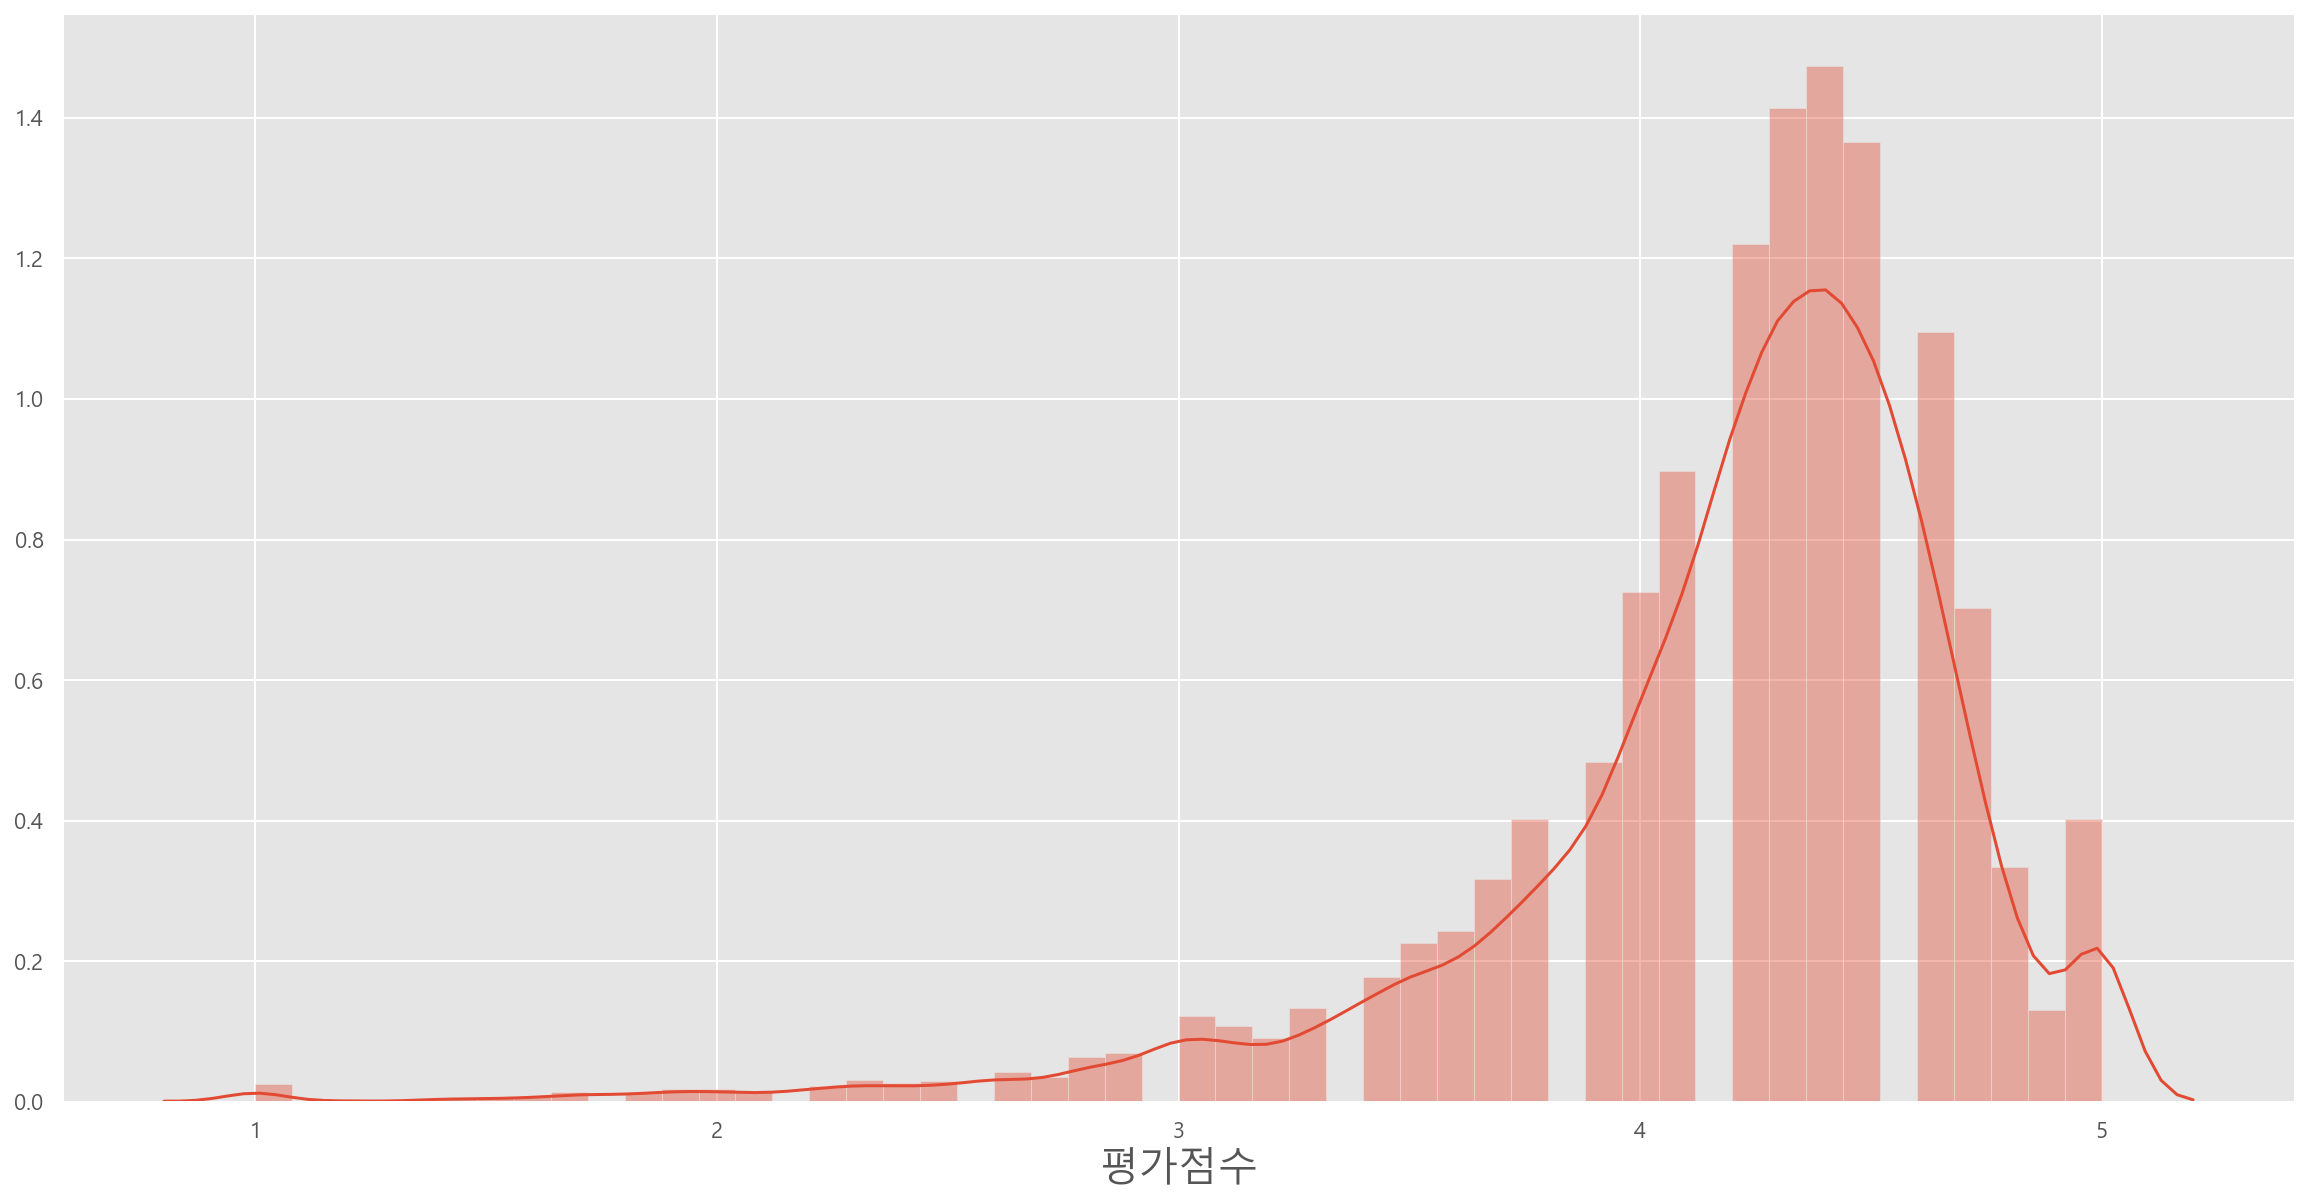



----------------------------------------------------------




유료와 무료의 분포를 구해보자


       cnt        비율
유료구분                
Free  6870  0.925627
Paid   552  0.074373




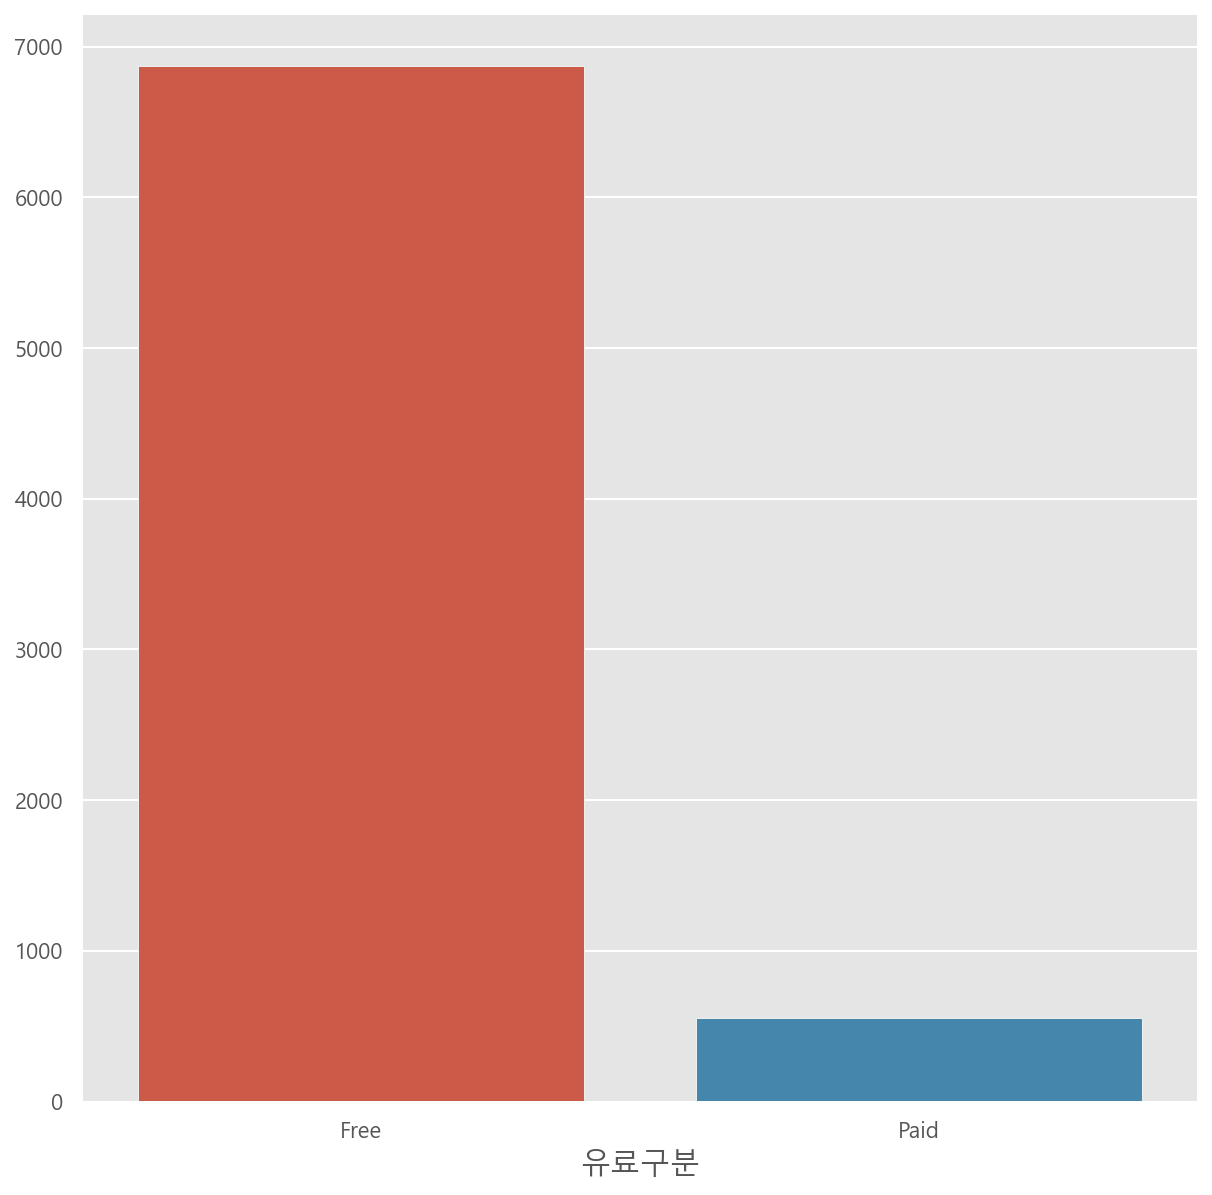



----------------------------------------------------------




가격대의 기초통계량


count    552.000000
mean      14.681866
std       61.257032
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: 가격, dtype: float64




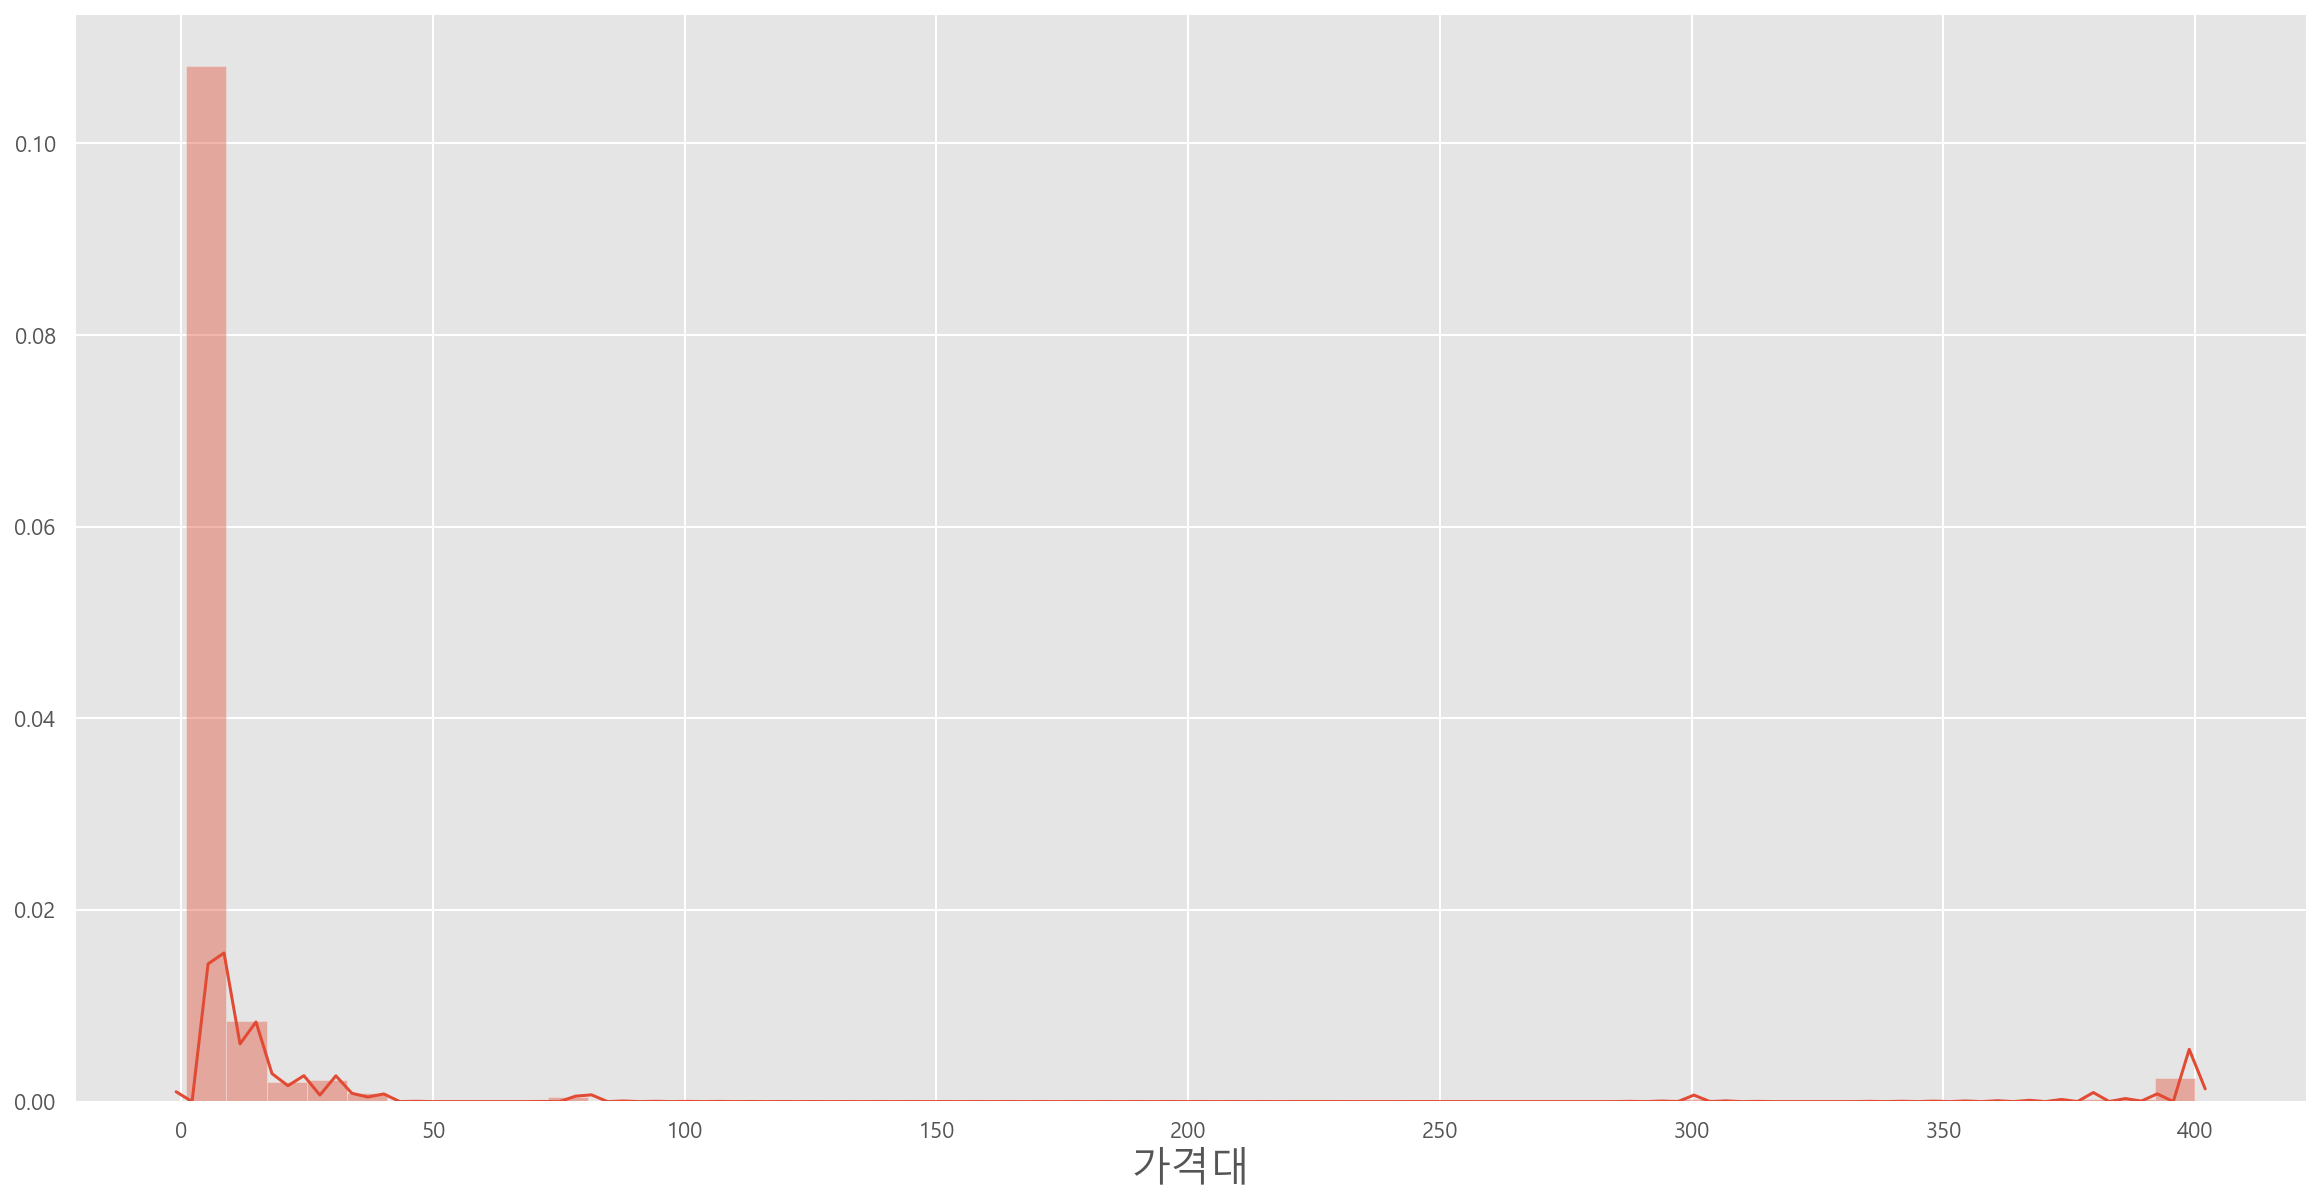

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [31]:
Represent(Total_data,"Everyone")

## Teen.. 이건 명확히 10대~ 20대 초중반..?!!

In [32]:
# Teen : 10대들!!
Temp[list_Temp[1]].장르.value_counts() / Temp[list_Temp[1]].장르.value_counts().sum()

Entertainment              0.166974
Action                     0.150369
Social                     0.097786
Shopping                   0.044280
Role Playing               0.044280
Simulation                 0.036900
Casino                     0.032288
Strategy                   0.029520
Adventure                  0.029520
Arcade                     0.029520
News & Magazines           0.028598
Personalization            0.025830
Video Players & Editors    0.022140
Communication              0.022140
Casual                     0.022140
Comics                     0.020295
Card                       0.019373
Books & Reference          0.018450
Lifestyle                  0.016605
Health & Fitness           0.015683
Sports                     0.013838
Education                  0.012915
Educational                0.011993
Photography                0.011070
Puzzle                     0.010148
Racing                     0.006458
Food & Drink               0.006458
Events                     0

In [33]:
# Teen.. 5개가 80% .. .이것을 보면 대략적으로 Teen을 파악 가능
Check(Temp[list_Temp[1]].장르.value_counts() / Temp[list_Temp[1]].장르.value_counts().sum())[:16]

Entertainment              0.166974
Action                     0.150369
Social                     0.097786
Shopping                   0.044280
Role Playing               0.044280
Simulation                 0.036900
Casino                     0.032288
Strategy                   0.029520
Adventure                  0.029520
Arcade                     0.029520
News & Magazines           0.028598
Personalization            0.025830
Video Players & Editors    0.022140
Communication              0.022140
Casual                     0.022140
Comics                     0.020295
Name: 장르, dtype: float64

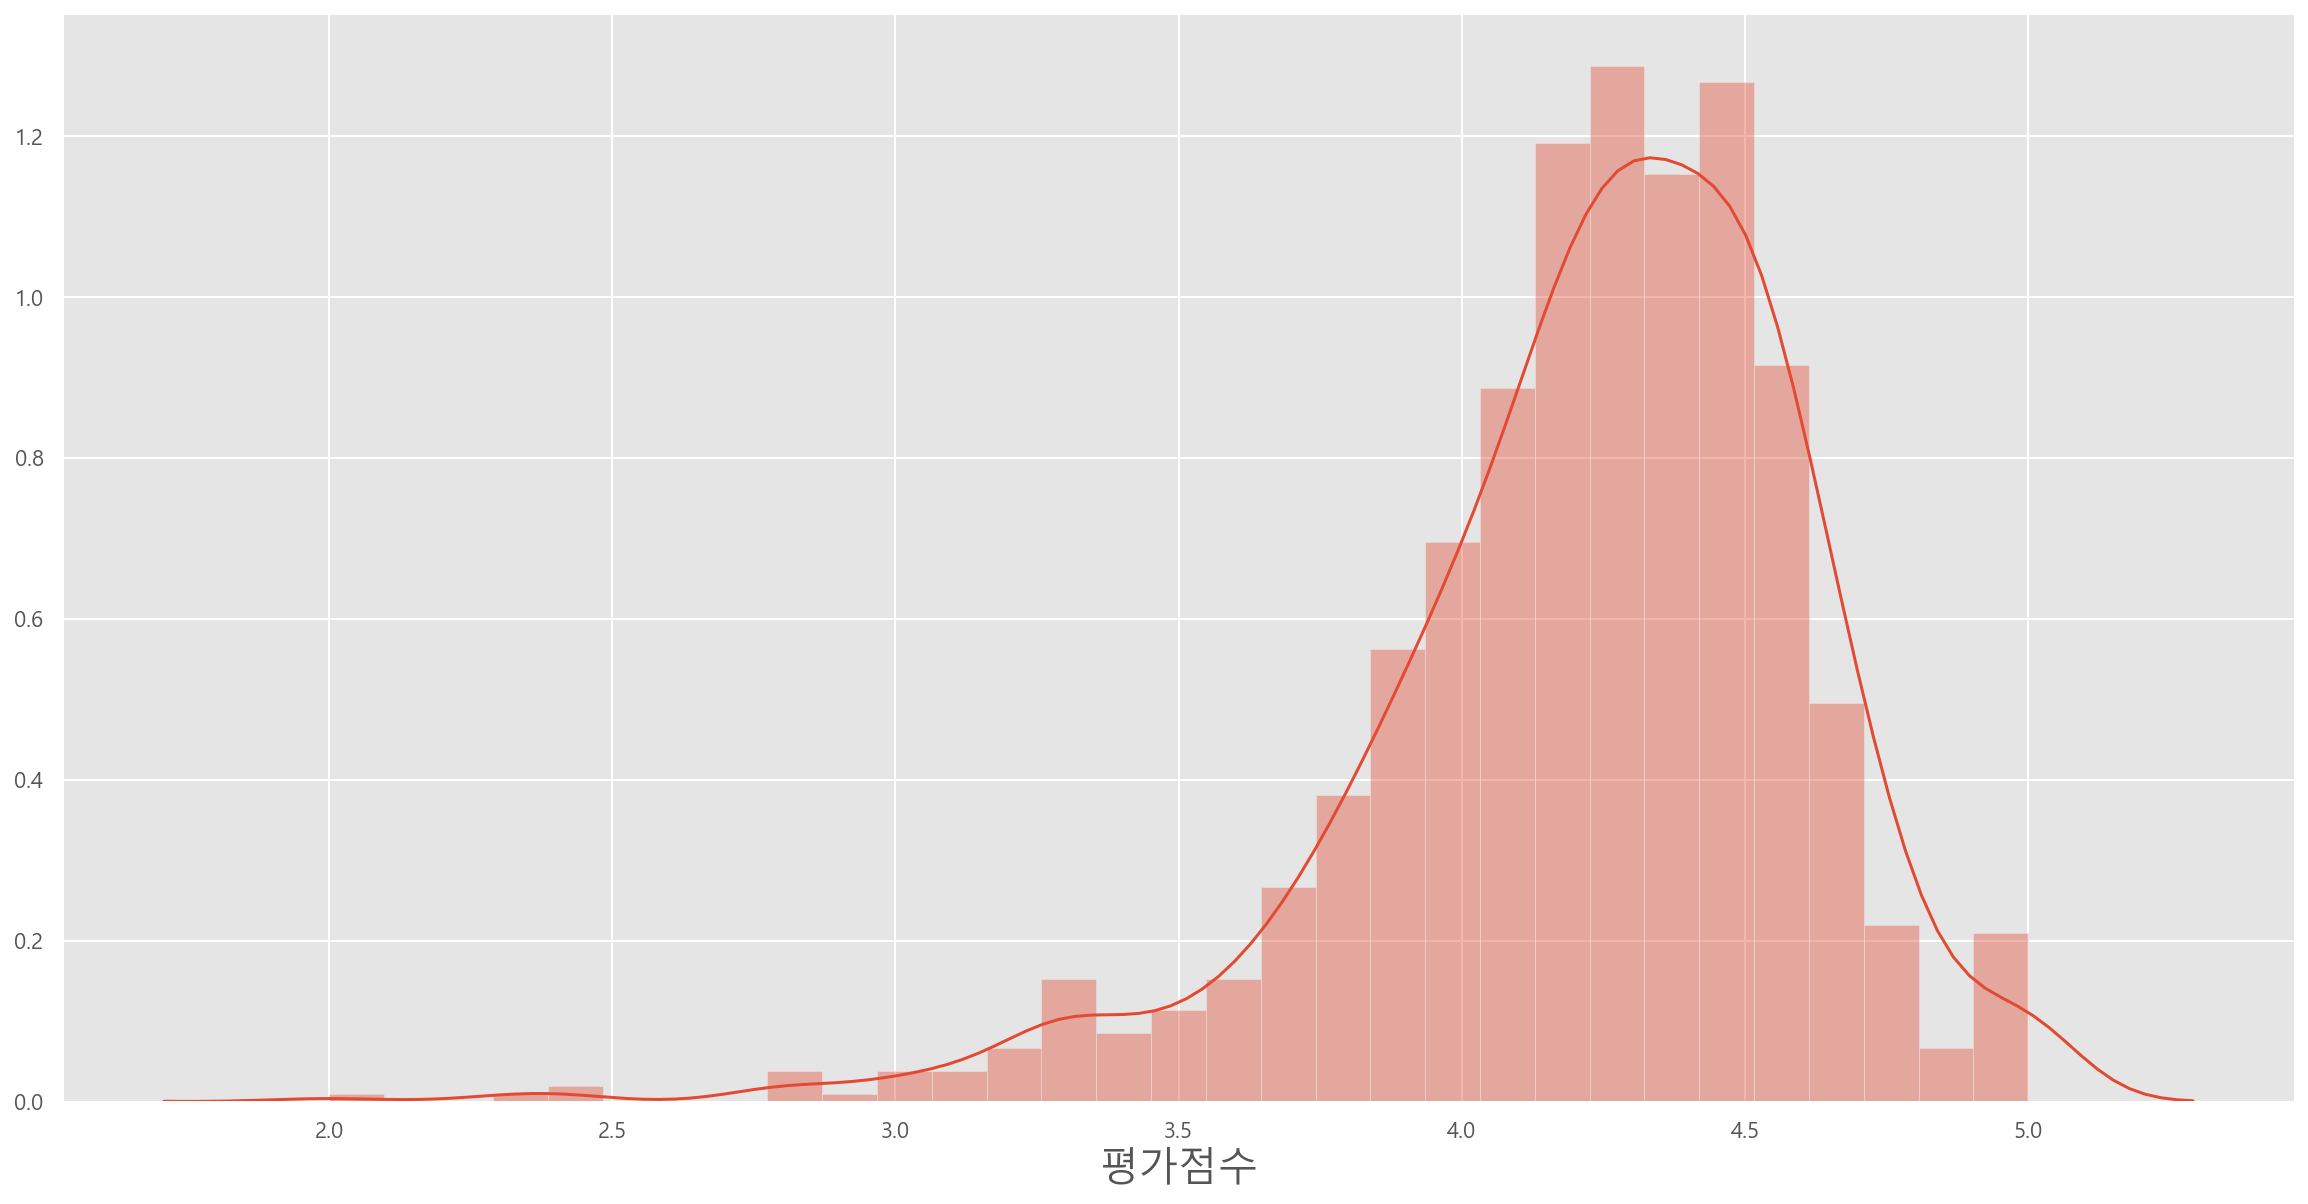



----------------------------------------------------------




유료와 무료의 분포를 구해보자


       cnt        비율
유료구분                
Free  1039  0.958487
Paid    45  0.041513




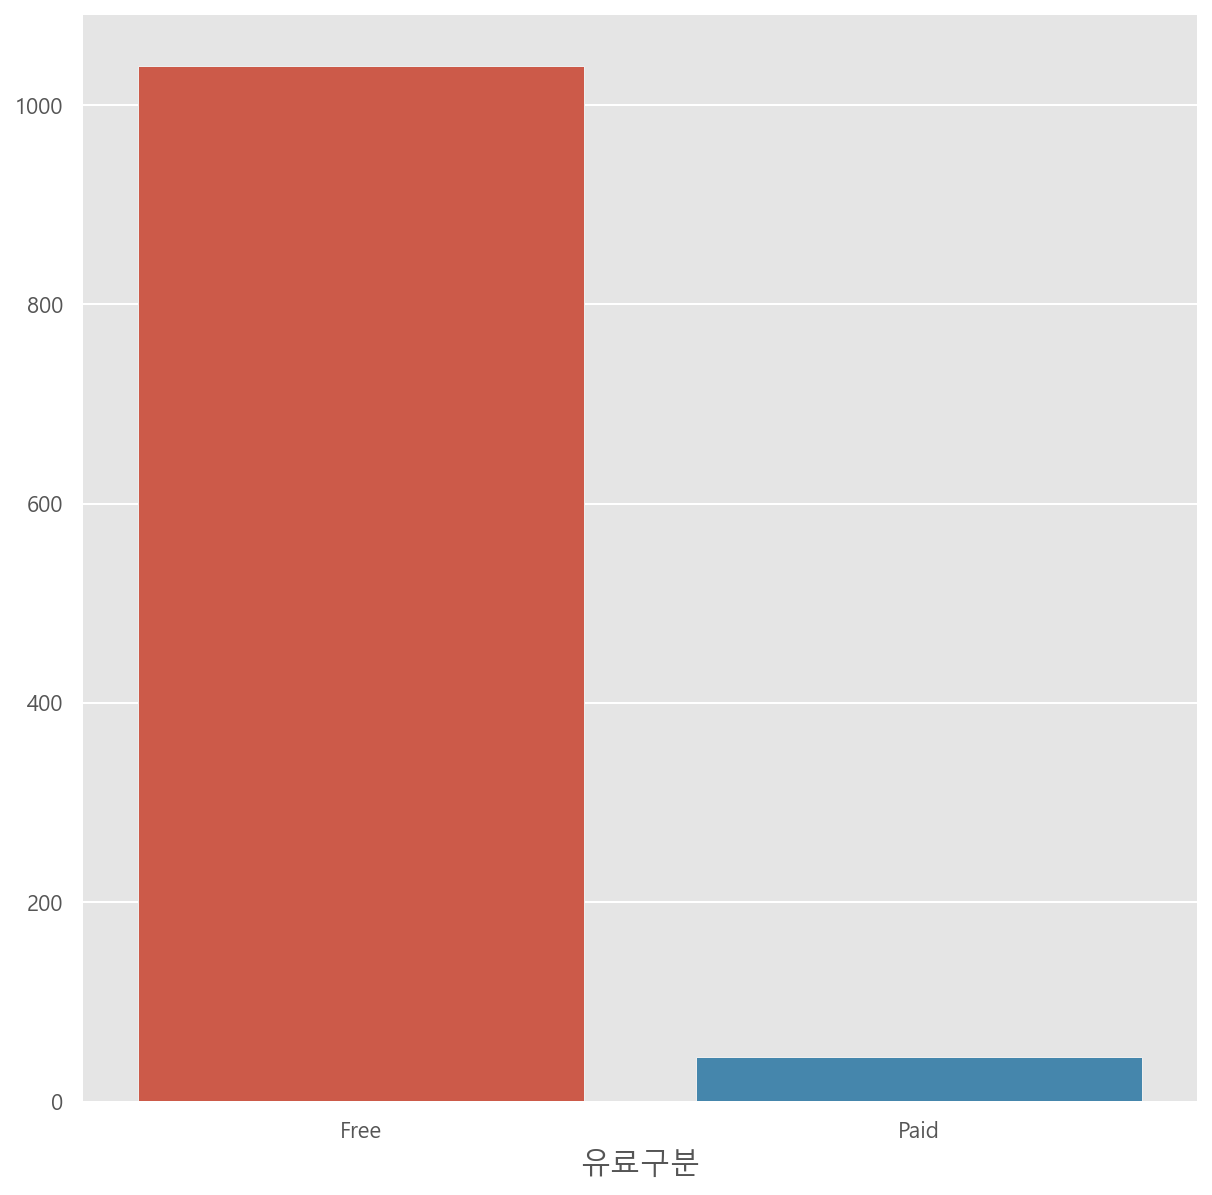



----------------------------------------------------------




가격대의 기초통계량


count     45.000000
mean      13.907556
std       59.007887
min        0.990000
25%        1.990000
50%        4.770000
75%        6.990000
max      399.990000
Name: 가격, dtype: float64




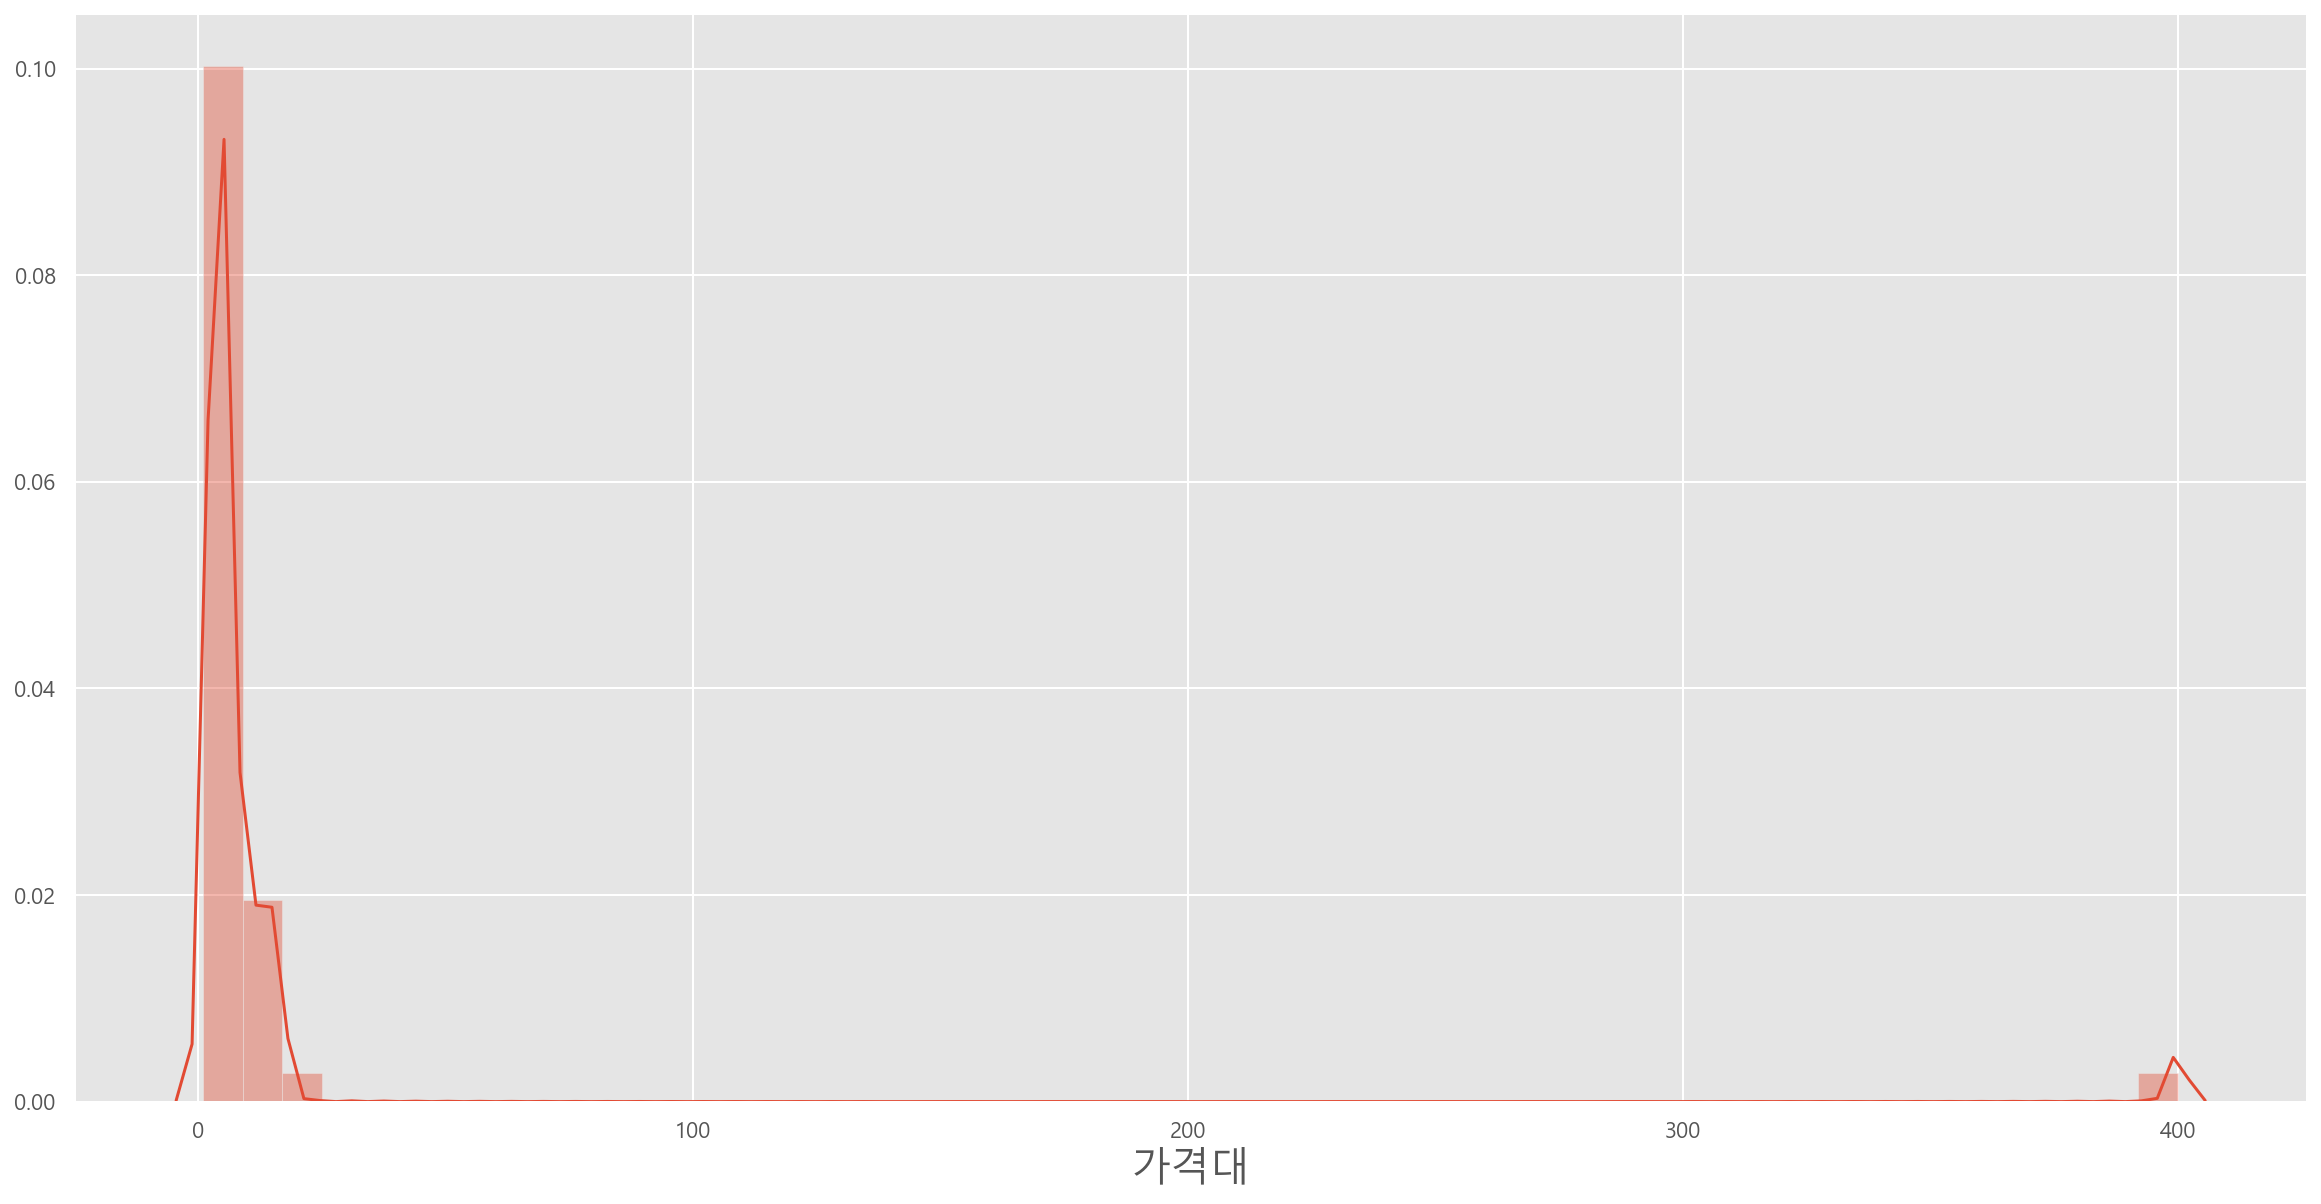

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,"1,000+",Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


In [34]:
Represent(Total_data,"Teen")

부모님이 부자신감.... 자랑하려고 가지고 다니나..

In [35]:
# Everyone10+ 10e대 이상.. 취준생..?
Temp[list_Temp[2]].장르.value_counts() / Temp[list_Temp[2]].장르.value_counts().sum()

News & Magazines           0.161209
Action                     0.136020
Strategy                   0.103275
Arcade                     0.098237
Role Playing               0.078086
Sports                     0.055416
Adventure                  0.047859
Casual                     0.042821
Simulation                 0.037783
Entertainment              0.037783
Education                  0.030227
Racing                     0.025189
Medical                    0.020151
Health & Fitness           0.015113
Personalization            0.012594
Books & Reference          0.012594
Lifestyle                  0.012594
Puzzle                     0.010076
Educational                0.007557
Board                      0.007557
Video Players & Editors    0.007557
Food & Drink               0.005038
Card                       0.005038
Comics                     0.005038
Social                     0.005038
Events                     0.005038
Art & Design               0.002519
Auto & Vehicles            0

In [36]:
Check(Temp[list_Temp[2]].장르.value_counts() / Temp[list_Temp[2]].장르.value_counts().sum())[:10]

News & Magazines    0.161209
Action              0.136020
Strategy            0.103275
Arcade              0.098237
Role Playing        0.078086
Sports              0.055416
Adventure           0.047859
Casual              0.042821
Simulation          0.037783
Entertainment       0.037783
Name: 장르, dtype: float64

In [37]:
print(list_Temp[2])
Everyone_10 = Total_data[list_Temp[2]]

Everyone 10+


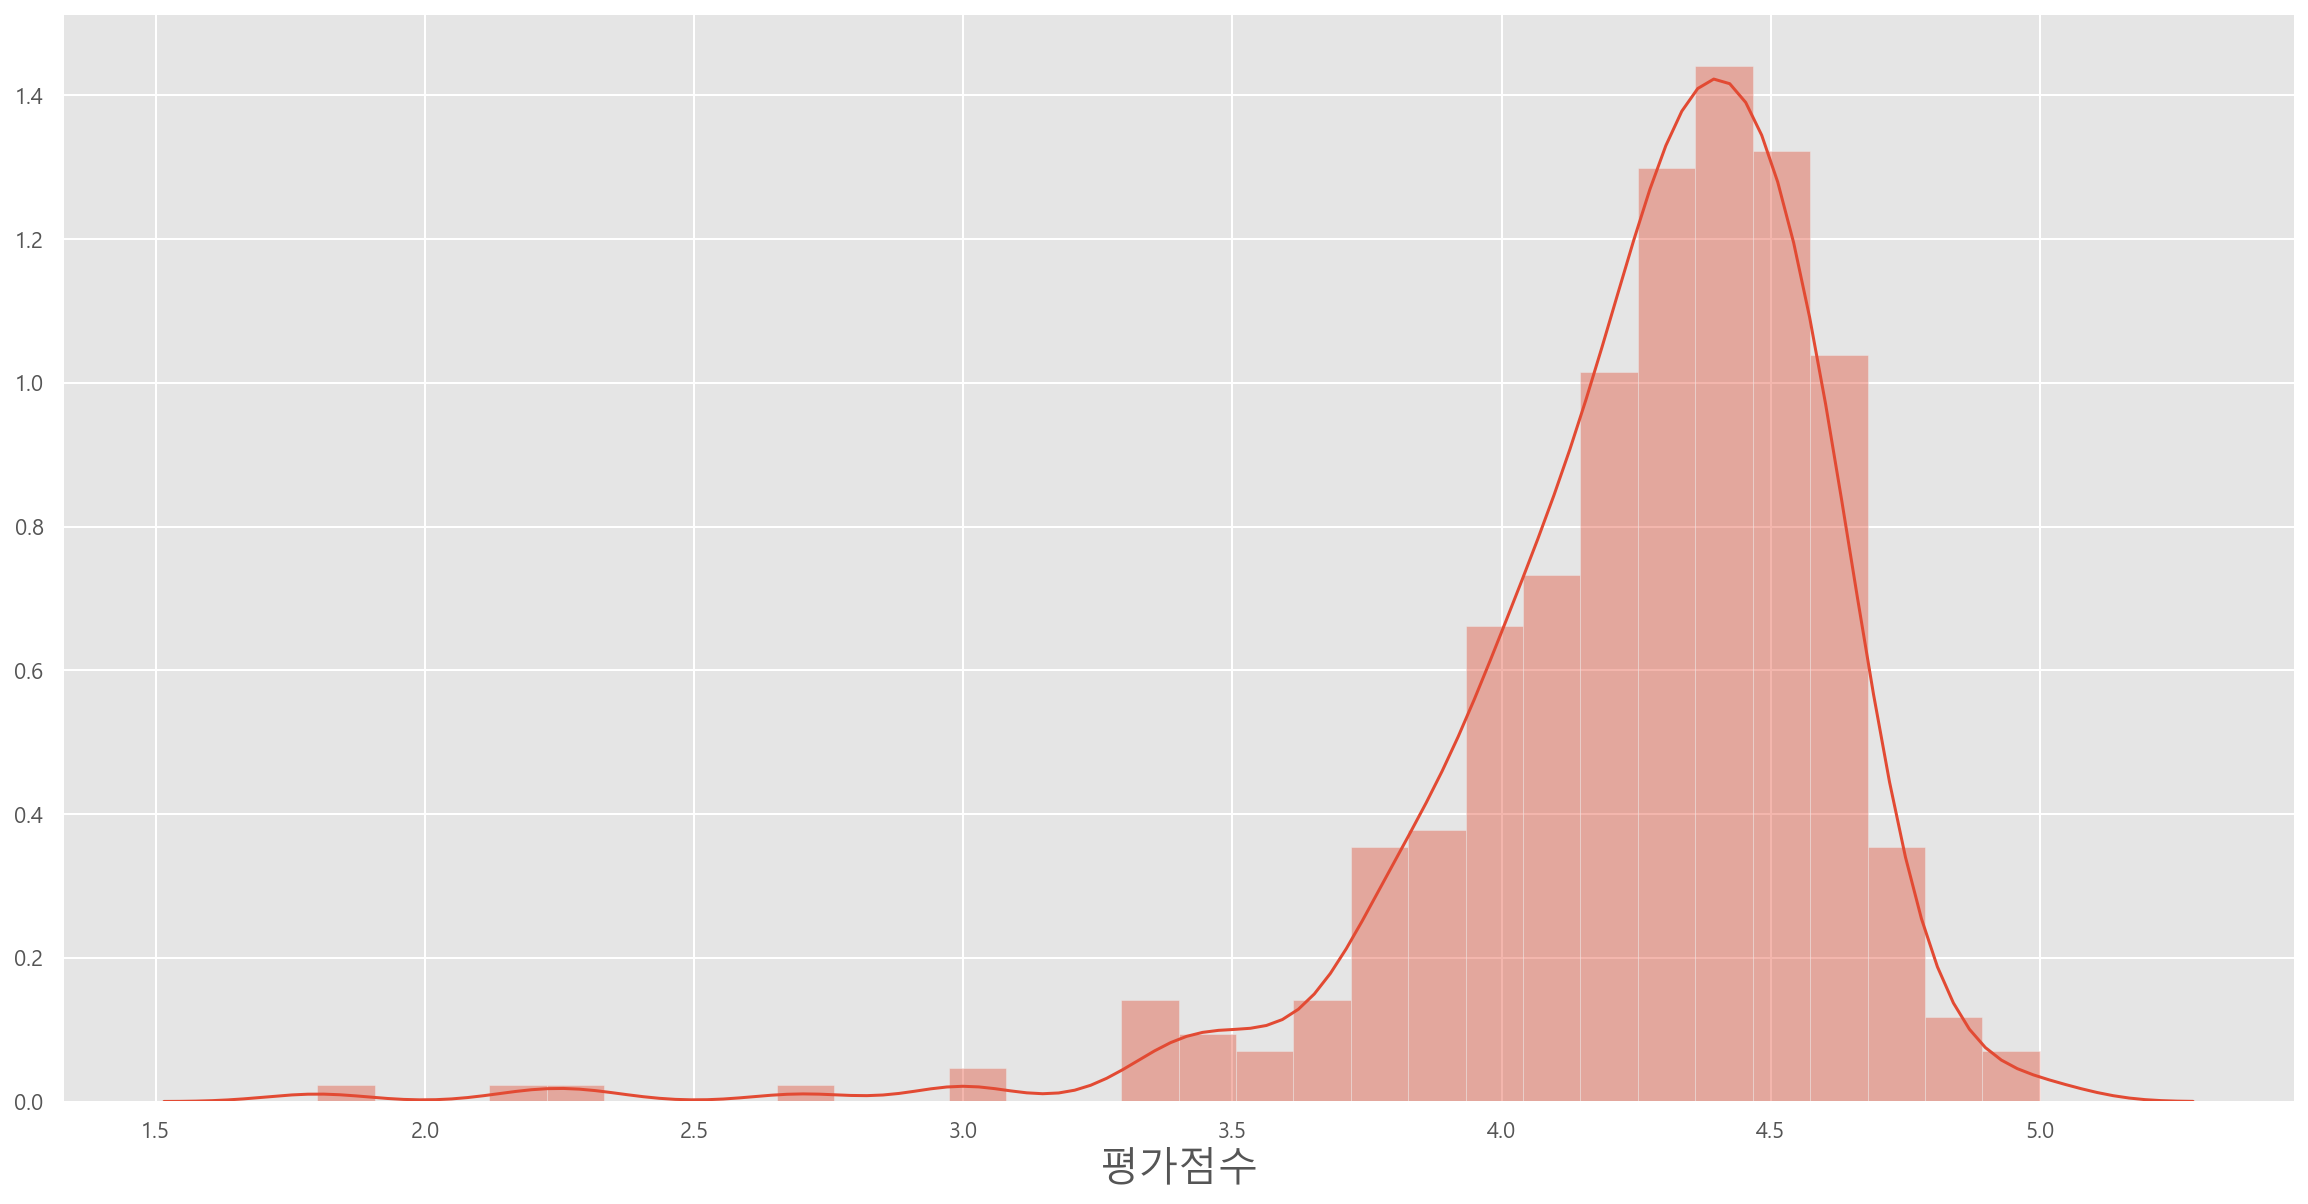



----------------------------------------------------------




유료와 무료의 분포를 구해보자


      cnt        비율
유료구분               
Free  364  0.916877
Paid   33  0.083123




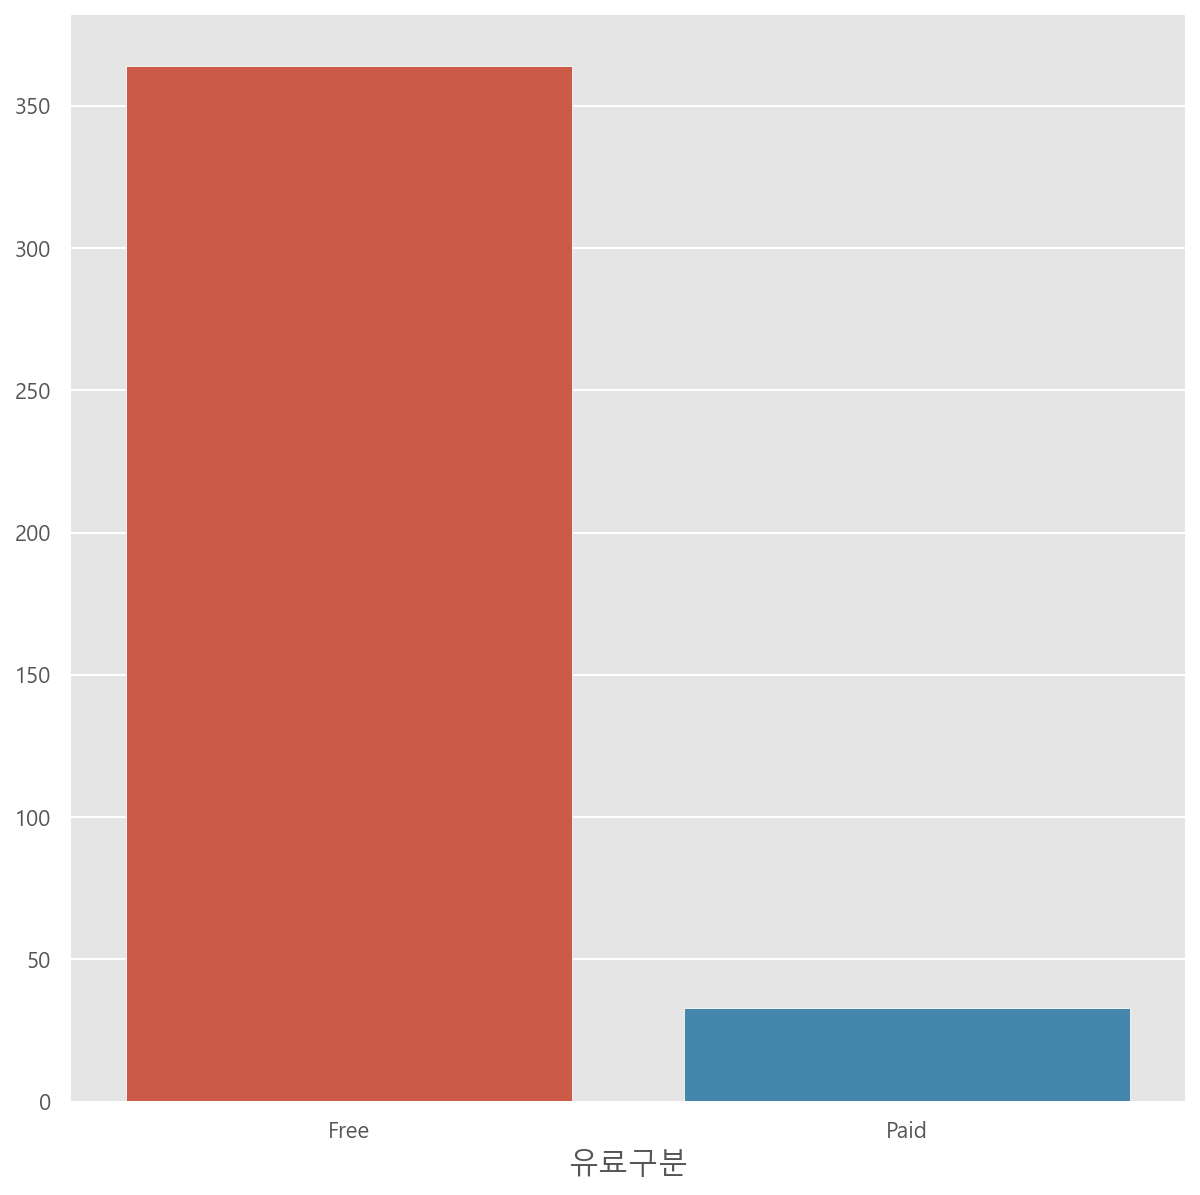



----------------------------------------------------------




가격대의 기초통계량


count    33.000000
mean      4.748182
std       4.610689
min       0.990000
25%       1.990000
50%       2.990000
75%       4.990000
max      19.990000
Name: 가격, dtype: float64




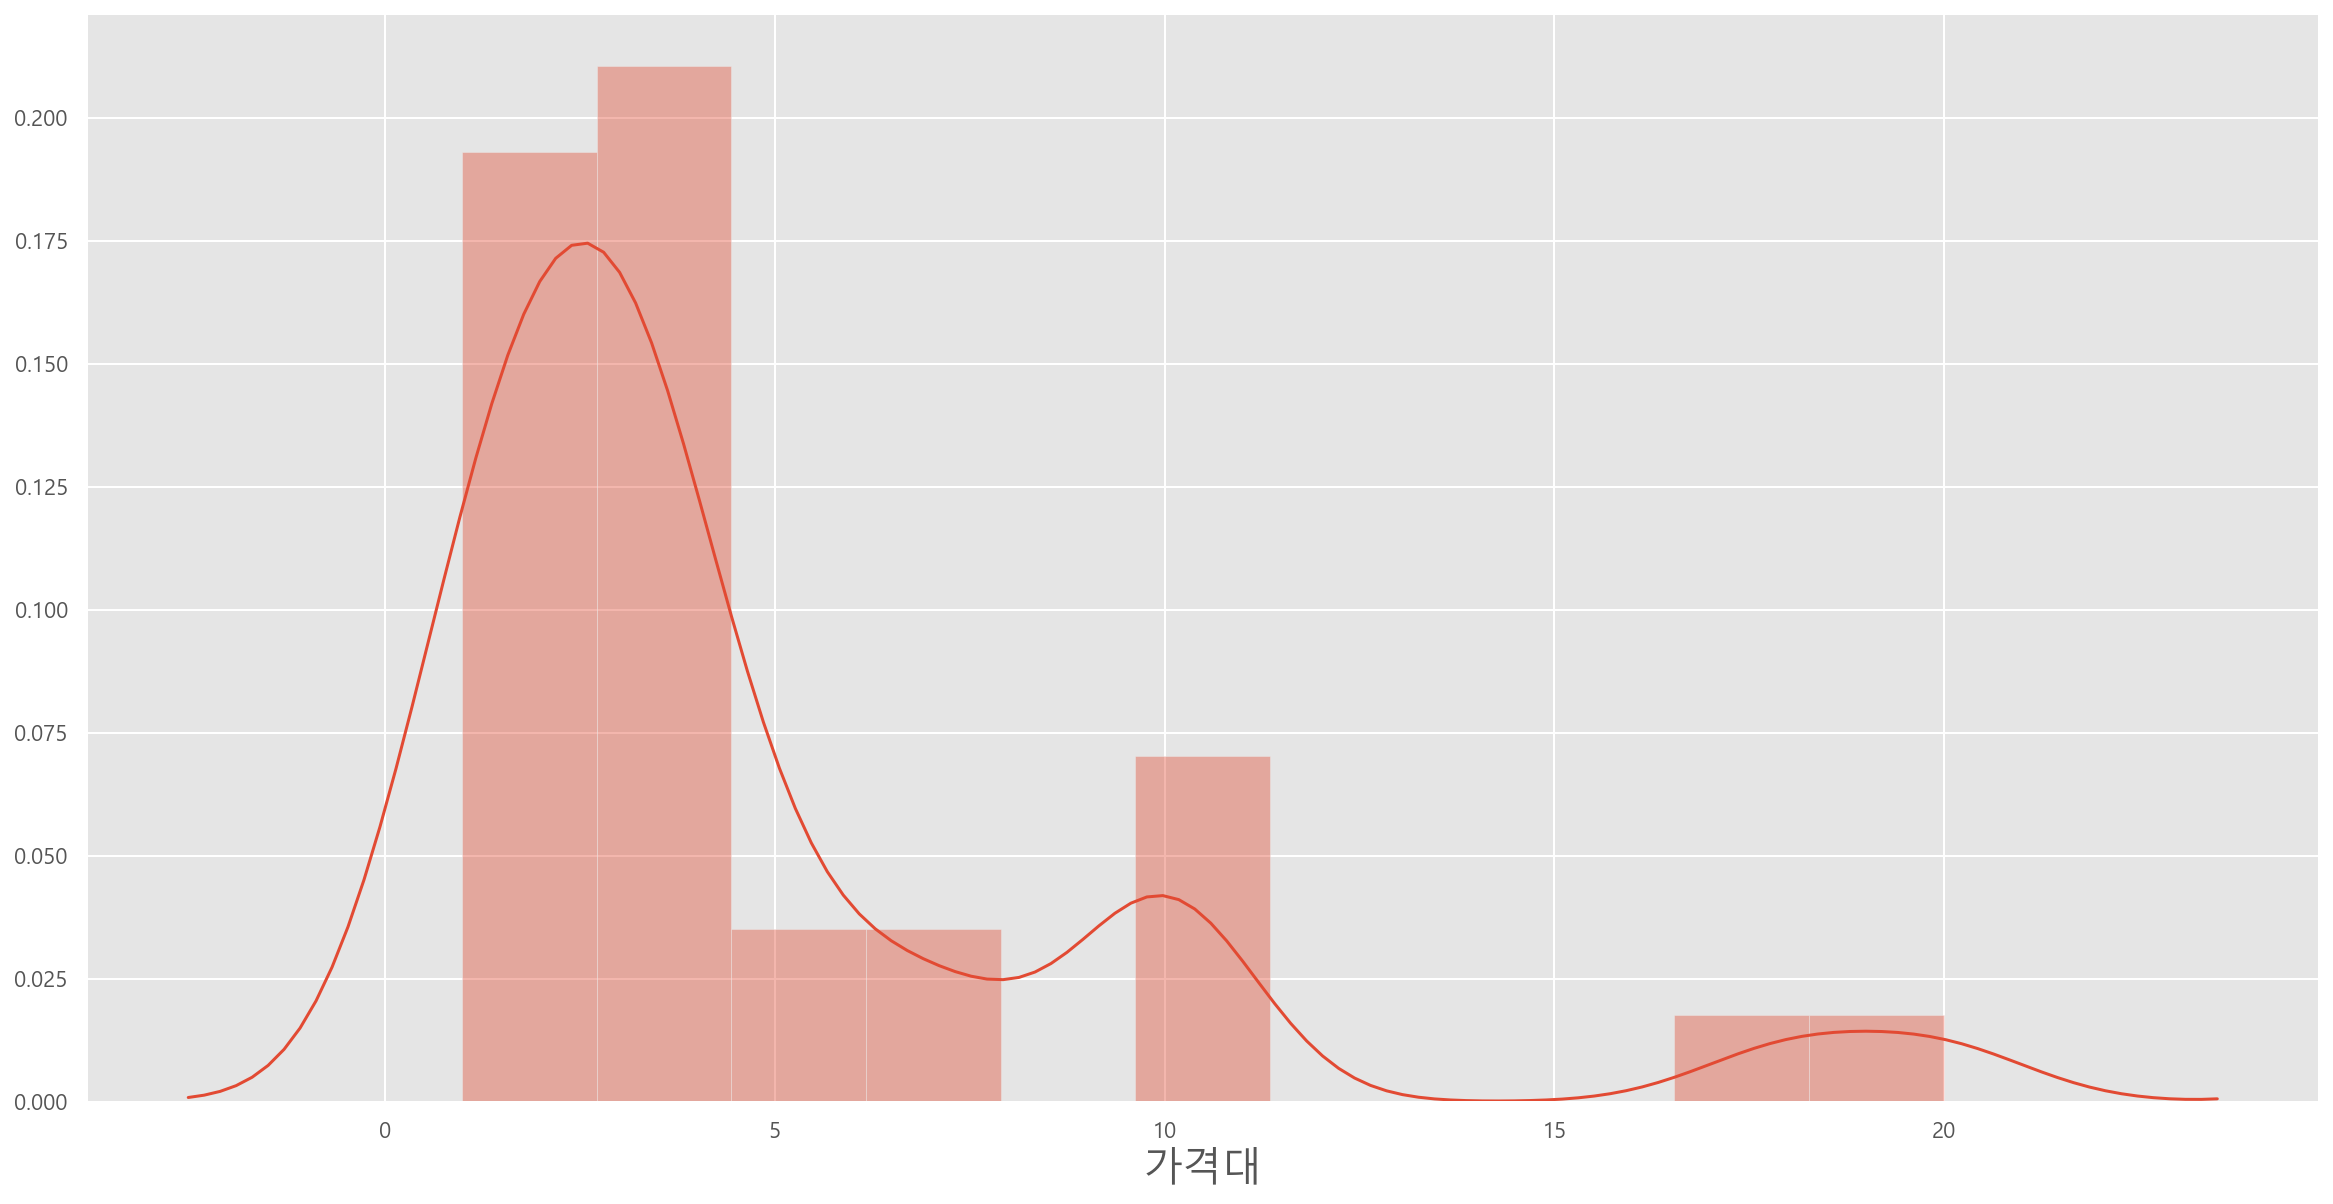

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
8719,DRAGON QUEST VIII,FAMILY,4.5,7812,27M,"50,000+",Paid,19.99,Everyone 10+,Role Playing,"April 4, 2017",1.1.4,4.0 and up


In [38]:
Represent(Total_data,"Everyone 10+")

In [39]:
# Mathre 17+
Temp[list_Temp[3]].장르.value_counts() / Temp[list_Temp[3]].장르.value_counts().sum()

Dating                     0.385776
Social                     0.142241
Action                     0.112069
Entertainment              0.079741
News & Magazines           0.028017
Simulation                 0.021552
Communication              0.019397
Comics                     0.019397
Lifestyle                  0.019397
Personalization            0.017241
Sports                     0.017241
Health & Fitness           0.015086
Medical                    0.012931
Adventure                  0.012931
Photography                0.010776
Racing                     0.010776
Education                  0.010776
Strategy                   0.008621
Shopping                   0.006466
Role Playing               0.006466
Books & Reference          0.006466
Music                      0.004310
Word                       0.004310
Arcade                     0.004310
Video Players & Editors    0.004310
Card                       0.002155
Beauty                     0.002155
Productivity               0

In [40]:
Check(Temp[list_Temp[3]].장르.value_counts() / Temp[list_Temp[3]].장르.value_counts().sum())[:8]

Dating              0.385776
Social              0.142241
Action              0.112069
Entertainment       0.079741
News & Magazines    0.028017
Simulation          0.021552
Communication       0.019397
Comics              0.019397
Name: 장르, dtype: float64

In [41]:
list_Temp[3]

'Mature 17+'

In [42]:
# Adults only 18+ ==> mature에 편승... 추론!!
 # Temp[list_Temp[4]].장르.value_counts()

In [43]:
# Data['장르'] = Data['장르'].replace("Adults only 18+","Mature 17+")

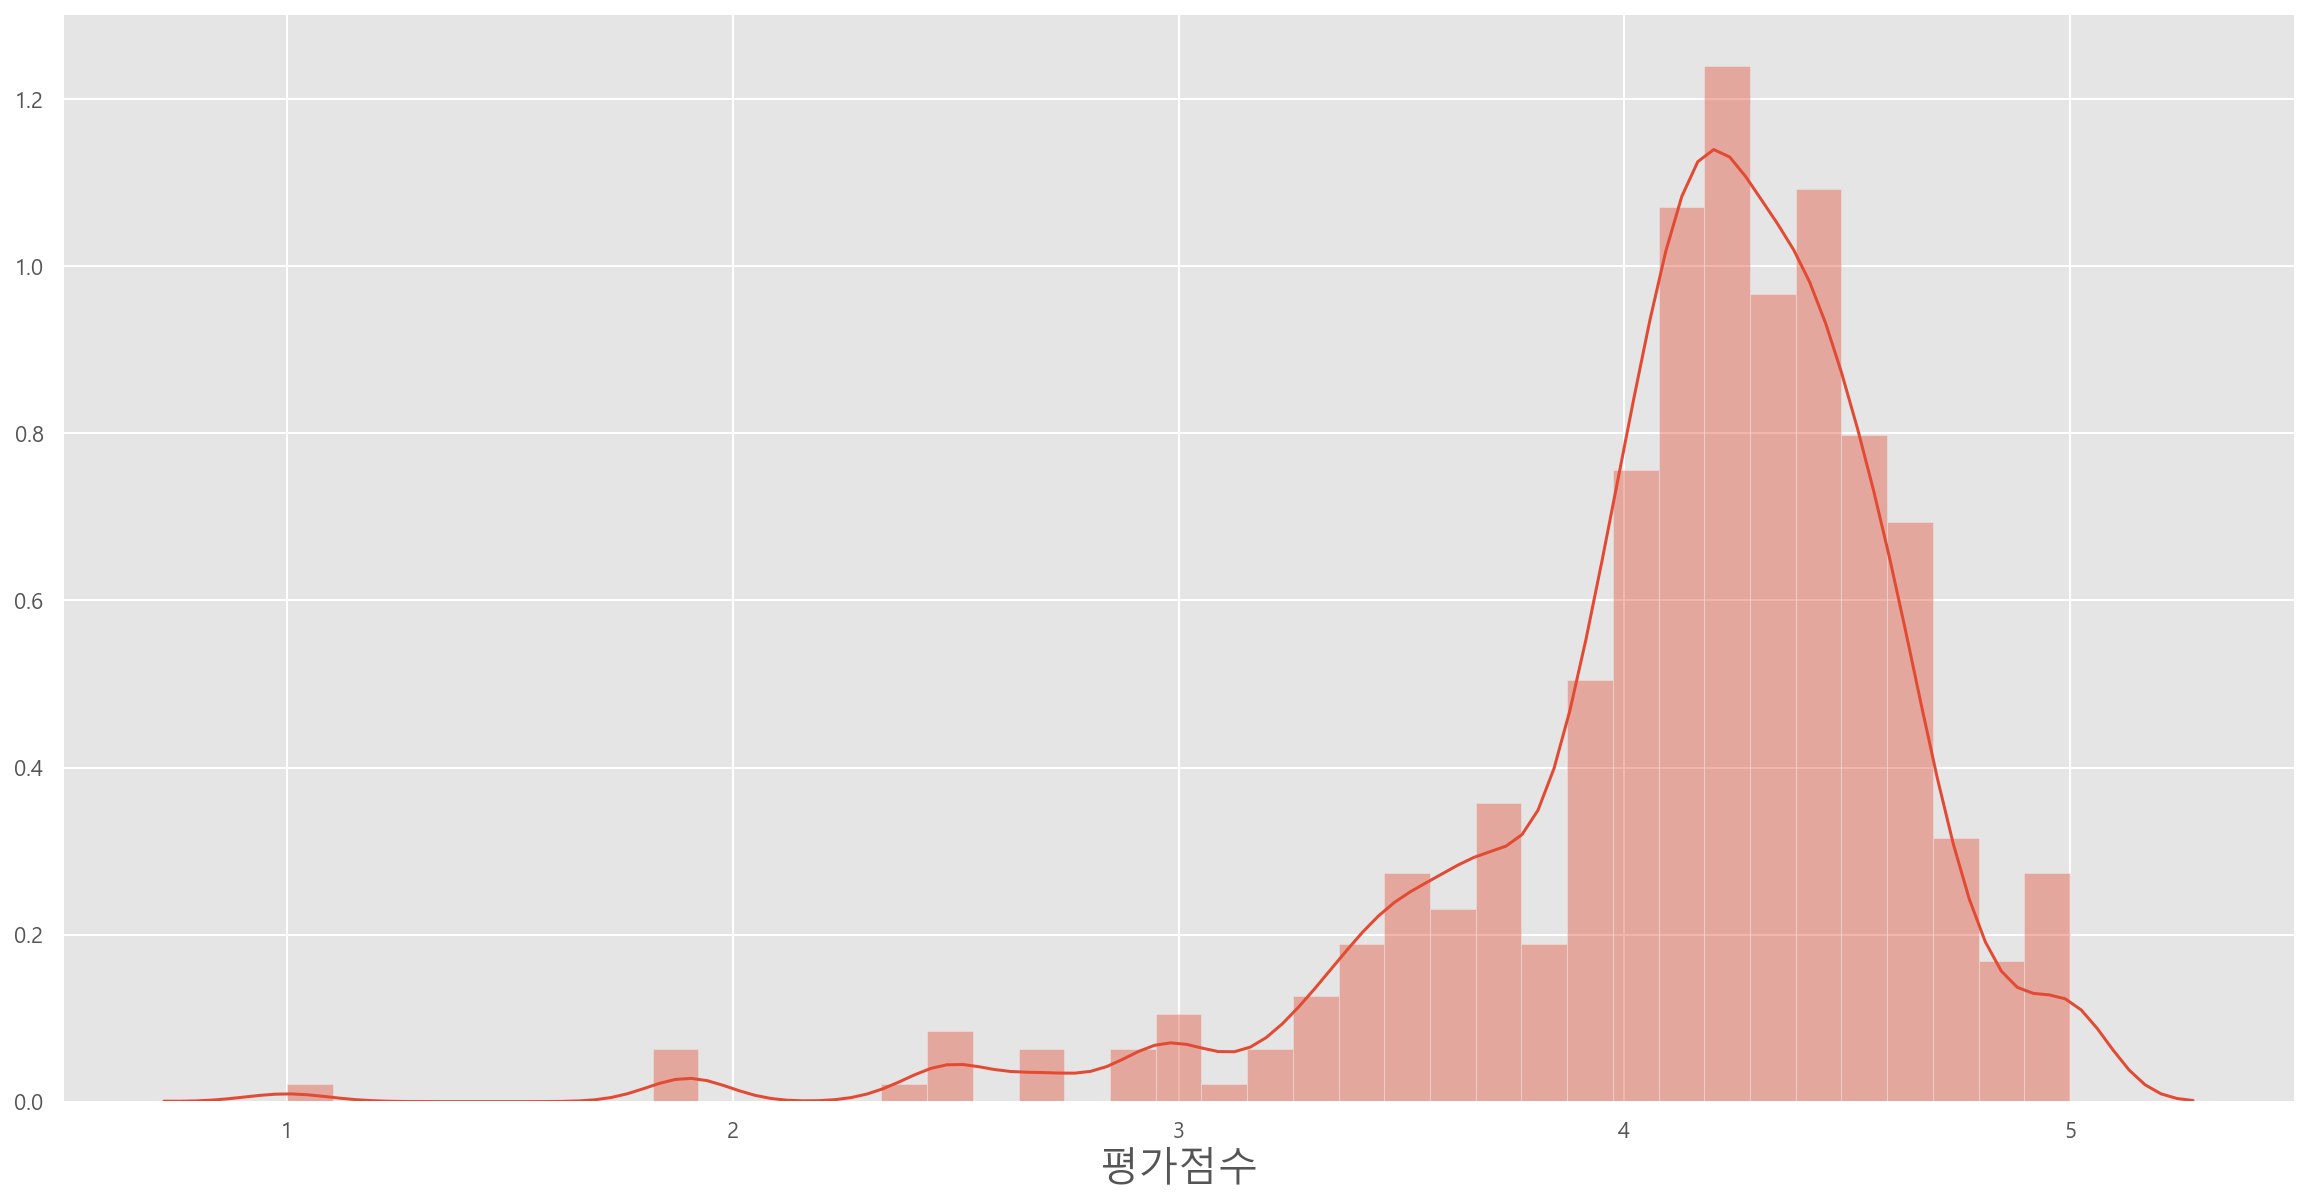



----------------------------------------------------------




유료와 무료의 분포를 구해보자


      cnt        비율
유료구분               
Free  447  0.963362
Paid   17  0.036638




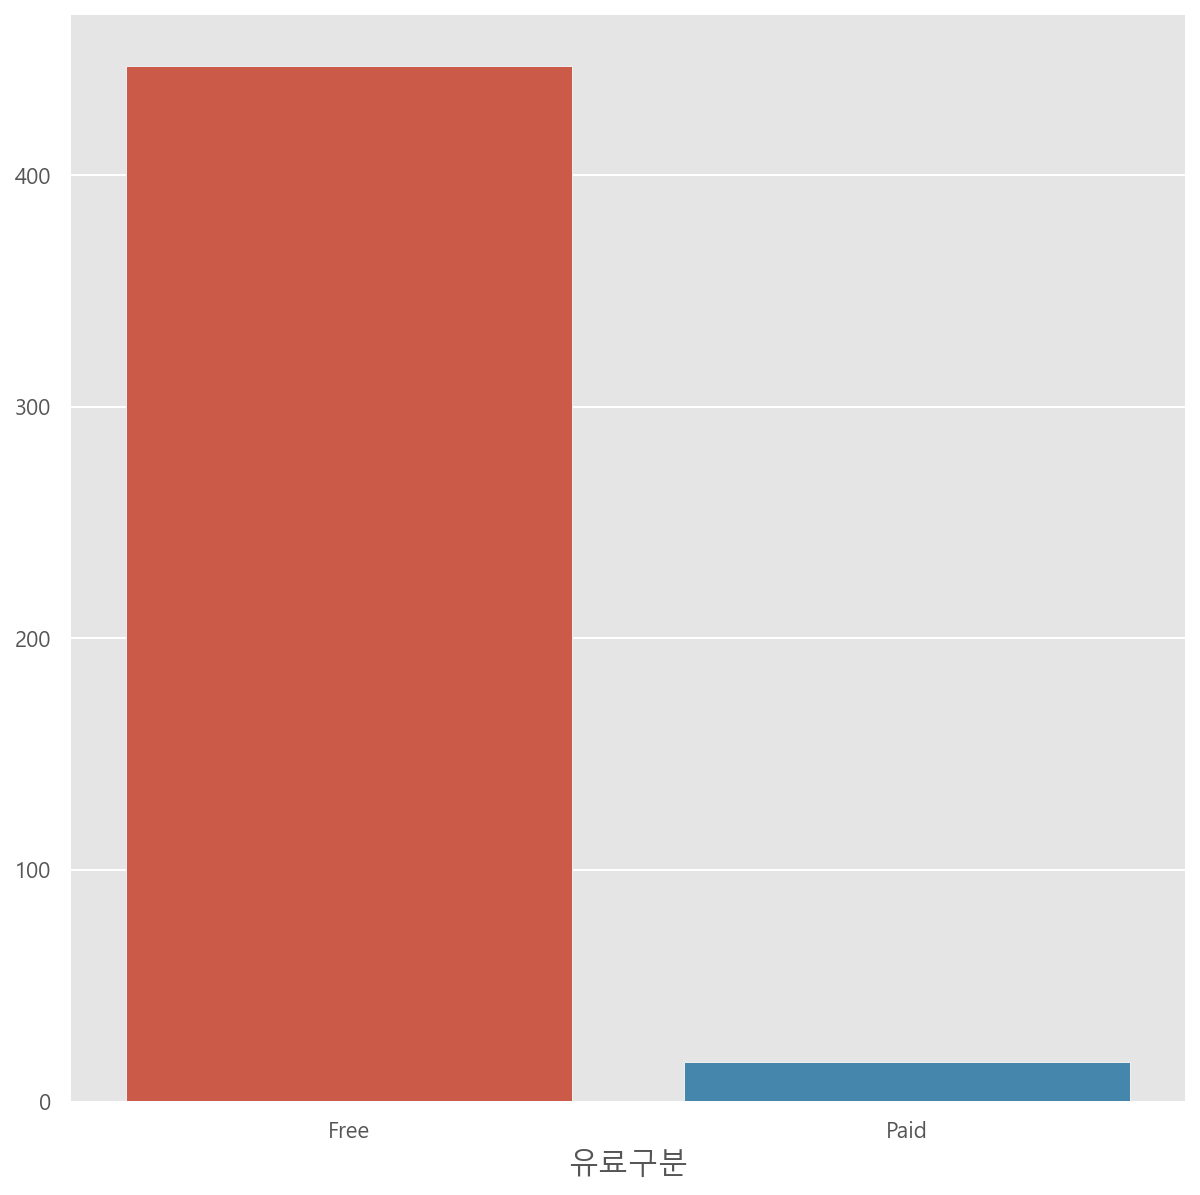



----------------------------------------------------------




가격대의 기초통계량


count    17.000000
mean      6.654706
std       6.974860
min       0.990000
25%       2.990000
50%       4.290000
75%       7.990000
max      29.990000
Name: 가격, dtype: float64




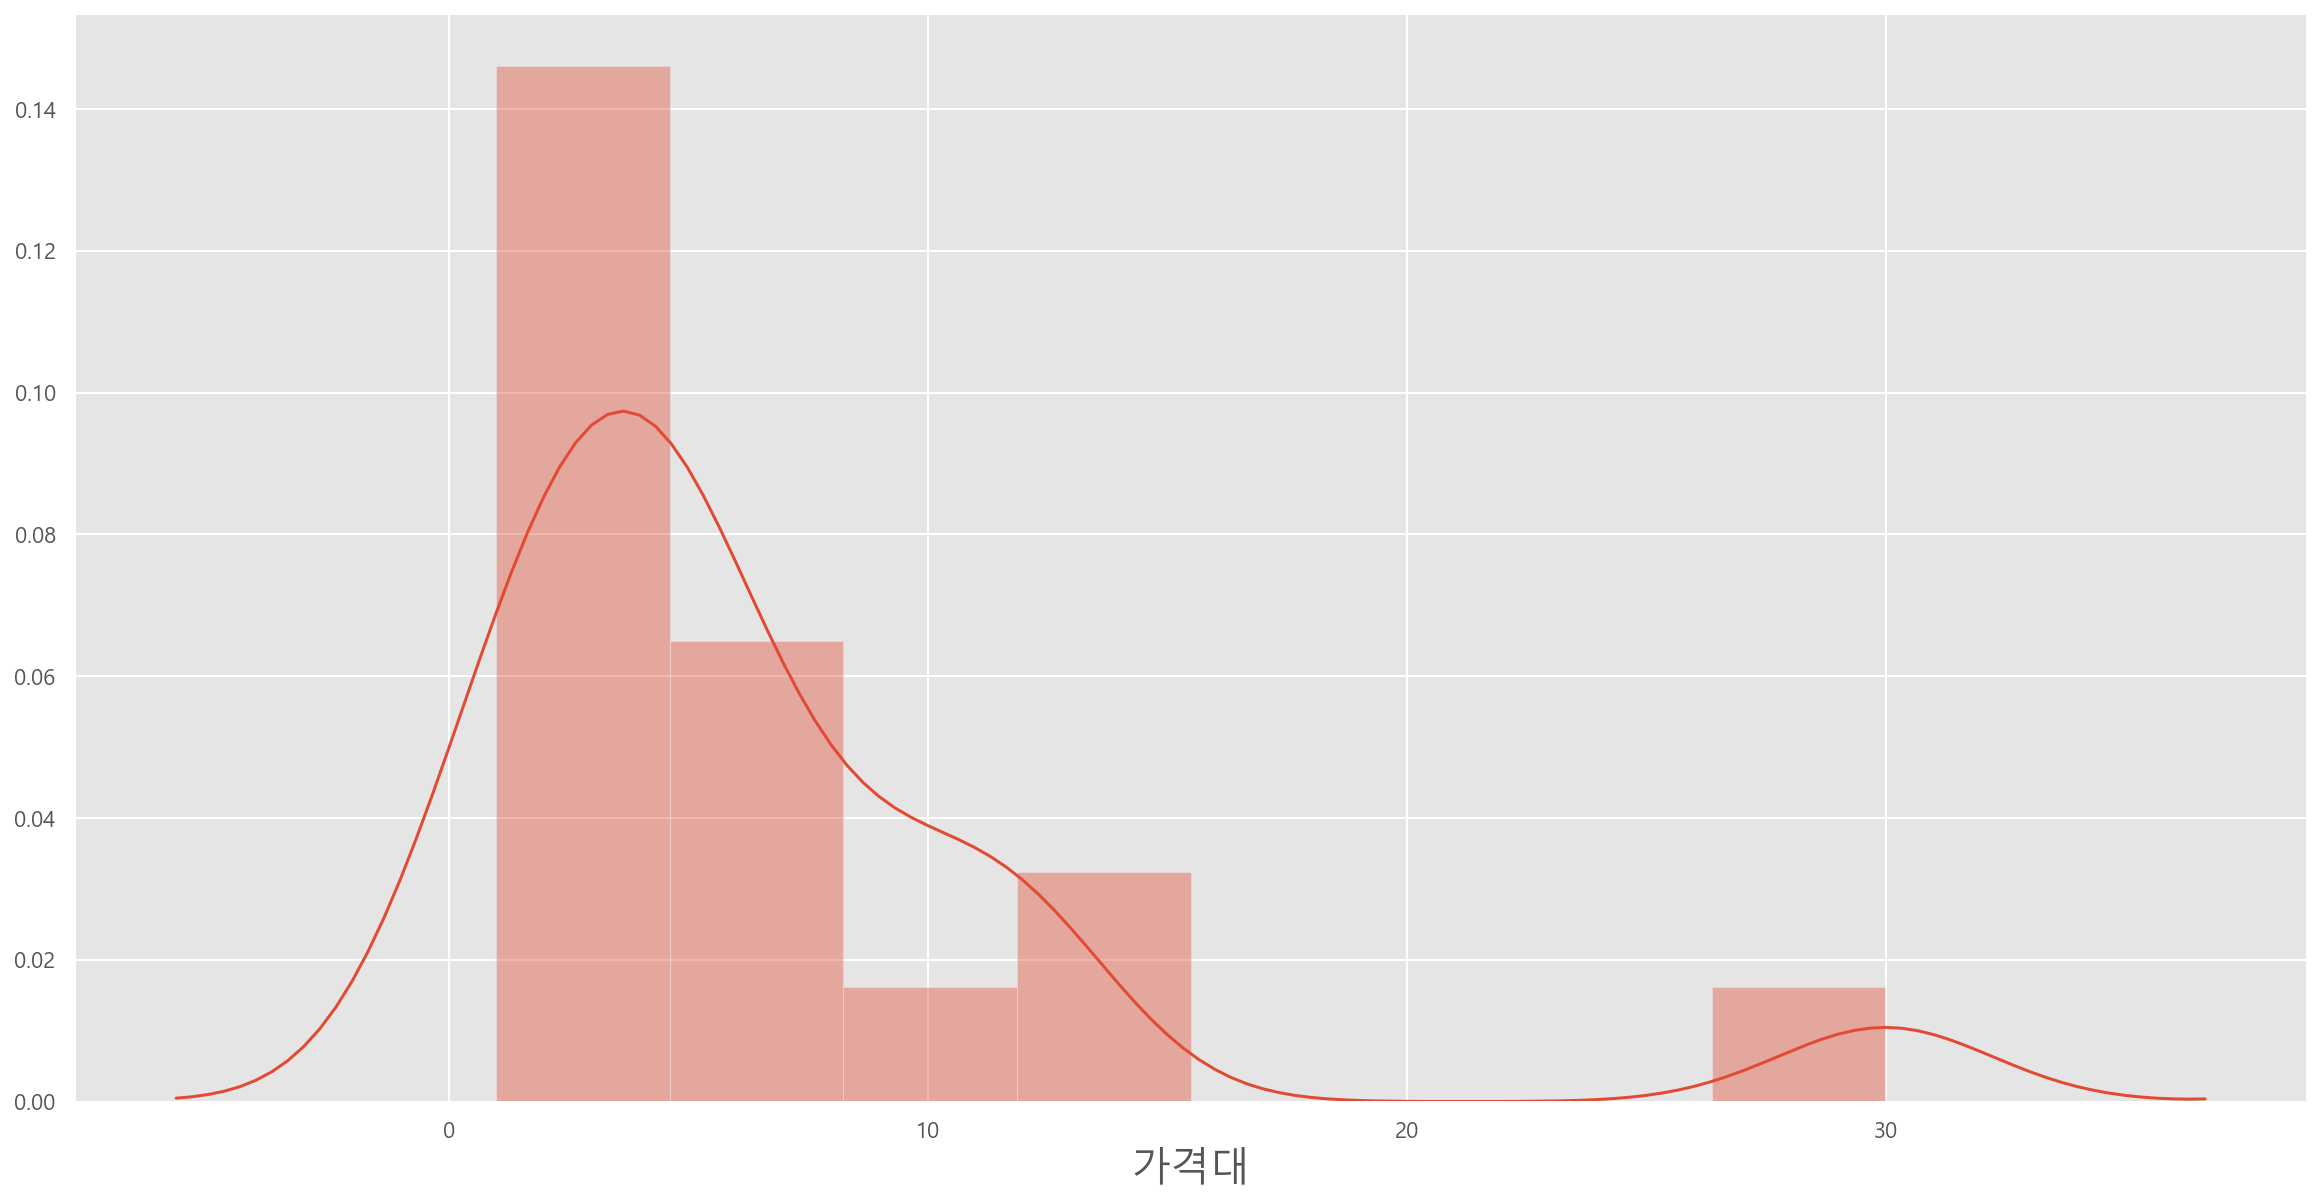

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
5489,AP Art History Flashcards,FAMILY,5.0,1,96M,10+,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up


In [44]:
Represent(Total_data,"Mature 17+")

In [45]:
Seg = pd.crosstab(Data.이용가능연령구분, Data.장르,margins = True).T

In [46]:
Seg.iloc[:,1].sort_values(ascending = False)[1:]

장르
News & Magazines           64
Action                     54
Strategy                   41
Arcade                     39
Role Playing               31
Sports                     22
Adventure                  19
Casual                     17
Simulation                 15
Entertainment              15
Education                  12
Racing                     10
Medical                     8
Health & Fitness            6
Lifestyle                   5
Books & Reference           5
Personalization             5
Puzzle                      4
Educational                 3
Board                       3
Video Players & Editors     3
Events                      2
Food & Drink                2
Card                        2
Comics                      2
Social                      2
Word                        1
Music                       1
Auto & Vehicles             1
Productivity                1
Art & Design                1
Weather                     1
Business                    0
Beauty 

## 고객군 설정 이후 단계

In [47]:
Everyone = Total_data['Everyone']

In [48]:
Everyone.다운로드수 = Everyone.다운로드수.apply(lambda x : x.replace("+",""))
Everyone.다운로드수 = Everyone.다운로드수.apply(lambda x : x.replace(",",""))

In [49]:
Everyone.다운로드수 = Everyone.다운로드수.apply(lambda x : int(x))

In [50]:
Teen = Total_data["Teen"]

In [51]:
def Down_adj(data):
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace("+",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : x.replace(",",""))
    data.다운로드수 = data.다운로드수.apply(lambda x : int(x))
    return data

In [52]:
Teen.다운로드수 = Teen.다운로드수.apply(lambda x : x.replace("+",""))
Teen.다운로드수 = Teen.다운로드수.apply(lambda x : x.replace(",",""))

In [53]:
Teen.다운로드수 = Teen.다운로드수.apply(lambda x : int(x))

In [54]:
Teen

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
34,I Creative Idea,ART_AND_DESIGN,4.7,353,4.2M,10000,Free,0.0,Teen,Art & Design,"April 27, 2018",1.6,4.1 and up
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,10000000,Free,0.0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.1,187,30M,50000,Free,0.0,Teen,Beauty,"July 24, 2018",3.0.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,1000000,Free,0.0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up
10804,Poker Pro.Fr,GAME,4.2,5442,17M,100000,Free,0.0,Teen,Card,"May 22, 2018",4.1.3,2.3 and up
10814,FR: My Secret Pets!,FAMILY,4.0,785,31M,50000,Free,0.0,Teen,Entertainment,"June 3, 2015",1.3.1,3.0 and up
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,5000,Free,0.0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up


In [55]:
Everyone_10 = Total_data['Everyone 10+']

In [56]:
Down_adj(Everyone_10)

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,500000,Free,0.0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
77,Police Detector (Speed Camera Radar),AUTO_AND_VEHICLES,4.3,3574,3.9M,1000000,Free,0.0,Everyone 10+,Auto & Vehicles,"July 4, 2018",1.6,4.0 and up
141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5M,100000,Free,0.0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up
186,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30M,10000000,Free,0.0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
308,Funny Jokes Photos,COMICS,4.4,39,4.3M,10000,Free,0.0,Everyone 10+,Comics,"July 3, 2018",1.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10419,Fast Motorcycle Driver 2016,GAME,4.2,28151,49M,1000000,Free,0.0,Everyone 10+,Racing,"December 25, 2016",1.2,2.3.3 and up
10639,Florida Today,NEWS_AND_MAGAZINES,3.3,202,38M,10000,Free,0.0,Everyone 10+,News & Magazines,"June 20, 2018",5.9.5,5.0 and up
10779,Fortune Quest: Savior,FAMILY,3.6,135,75M,10000,Free,0.0,Everyone 10+,Role Playing,"June 1, 2018",1.022,4.4 and up
10784,Big Hunter,GAME,4.3,245455,84M,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [57]:
Total_data.keys()

dict_keys(['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen'])

In [58]:
Mature_17= Total_data['Mature 17+']

In [59]:
Down_adj(Mature_17)

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
133,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,8.2M,100000,Free,0.0,Mature 17+,Beauty,"March 1, 2017",1.0.2.0,1.6 and up
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,23M,5000000,Free,0.0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
170,Flybook,BOOKS_AND_REFERENCE,3.9,1778,4.9M,500000,Free,0.0,Mature 17+,Books & Reference,"October 16, 2014",1.0.3,2.1 and up
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,500000,Free,0.0,Mature 17+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
302,MangaToon - Comics updated Daily,COMICS,3.9,834,15M,50000,Free,0.0,Mature 17+,Comics,"August 1, 2018",1.0.8,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,Frontline Terrorist Battle Shoot: Free FPS Sho...,GAME,4.2,9183,49M,1000000,Free,0.0,Mature 17+,Action,"June 22, 2018",1.1,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10783,Modern Counter Terror Attack – Shooting Game,GAME,4.2,340,72M,50000,Free,0.0,Mature 17+,Action,"October 27, 2017",1.0,4.1 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [60]:
with open('Everyone.pickle','wb') as f:
    pickle.dump(Everyone,f)

In [61]:
with open('Teen.pickle','wb') as f:
    pickle.dump(Teen,f)

In [62]:
with open('Everyone_10.pickle','wb') as f:
    pickle.dump(Everyone_10,f)

In [63]:
with open('Mature_17.pickle','wb') as f:
    pickle.dump(Mature_17,f)

In [64]:
print(Everyone.shape, Teen.shape, Everyone_10.shape,Mature_17.shape)

(7422, 13) (1084, 13) (397, 13) (464, 13)
